# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks. 

9. You may discuss broad ideas with friends, but all code must be written by yourself.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Plotting the data and prediction is highly encouraged for debugging. But remove debugging/understanding code before submitting.

12. Before subbmission ensure that you submit with the outputs (do not clear the outputs), so that when evaluating we can run selectively.

13. Before submission ensure that the path for the folder containing the data is "../../Data/" 


In [3]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt


**Cell type : TextRead**

# Problem 1: Learning Binary Bayes Classifiers from data with Max. Likelihood 

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. 

1a) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

1b) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

1c) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*




In [4]:
# Cell type : CodeWrite

def Bayes1a(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    n = np.shape(Y_train)[0]
    d = np.shape(X_train)[1]
    pind = lambda x: 1 if x > 0 else 0
    nind = lambda x: 1 if x < 0 else 0
    pos_ind = np.apply_along_axis(pind, 1, Y_train.reshape(n,1))
    neg_ind = np.apply_along_axis(nind, 1, Y_train.reshape(n,1))
    #print(pos_ind.reshape(100,20).tolist())
    n_pos = np.sum(pos_ind)
    n_neg = n - n_pos
    a = n_pos / n
    mup = np.sum(X_train[pos_ind == 1], axis = 0)/n_pos
    mun = np.sum(X_train[pos_ind == 0], axis = 0)/n_neg
    w = mun - mup
    b = ((np.linalg.norm(mup))**2 - (np.linalg.norm(mun))**2)/2
    #print(w)
    #print(b)
    thres = np.log(a/(1-a))
    #print(thres)
    pred = (lambda x: 1 if ((np.dot(w.T, x) + b) <= thres) else -1)
    return (np.apply_along_axis(pred, 1, X_test))
    

def Bayes1b(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    n = np.shape(Y_train)[0]
    d = np.shape(X_train)[1]
    pind = lambda x: 1 if x > 0 else 0
    nind = lambda x: 1 if x < 0 else 0
    pos_ind = np.apply_along_axis(pind, 1, Y_train.reshape(n,1))
    neg_ind = np.apply_along_axis(nind, 1, Y_train.reshape(n,1))
    #print(pos_ind.reshape(100,20).tolist())
    n_pos = np.sum(pos_ind)
    n_neg = n - n_pos
    a = n_pos / n
    X_pos = X_train * pos_ind.reshape(n, 1)
    X_neg = X_train * neg_ind.reshape(n, 1)
    X_pos = X_pos[~np.all(X_pos == 0, axis = 1)]
    X_neg = X_neg[~np.all(X_neg == 0, axis = 1)] 
    mup = np.sum(X_train[pos_ind == 1], axis = 0)/n_pos
    mun = np.sum(X_train[pos_ind == 0], axis = 0)/n_neg
    sigmap = ((X_pos - mup).T @ (X_pos - mup))/n_pos
    sigman = ((X_neg - mun).T @ (X_neg - mun))/n_neg
    thres = np.log(a/(1-a))
    sigma =  (sigmap*n_pos + sigman*n_neg)/n
    sigmai = np.linalg.inv(sigma)
    w = (2*(mun.T - mup.T)) @ sigmai
    b = (mup.T @ sigmai @ mup - mun.T @sigmai @ mun)
    pred = (lambda x: 1 if ((np.dot(w, x) + b) <= 2*thres) else -1)
    return (np.apply_along_axis(pred, 1, X_test))

def Bayes1c(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    n = np.shape(Y_train)[0]
    d = np.shape(X_train)[1]
    pind = lambda x: 1 if x > 0 else 0
    nind = lambda x: 1 if x < 0 else 0
    pos_ind = np.apply_along_axis(pind, 1, Y_train.reshape(n,1))
    neg_ind = np.apply_along_axis(nind, 1, Y_train.reshape(n,1))
    #print(pos_ind.reshape(100,20).tolist())
    n_pos = np.sum(pos_ind)
    n_neg = n - n_pos
    a = n_pos / n
    X_pos = X_train * pos_ind.reshape(n, 1)
    X_neg = X_train * neg_ind.reshape(n, 1)
    X_pos = X_pos[~np.all(X_pos == 0, axis = 1)]
    X_neg = X_neg[~np.all(X_neg == 0, axis = 1)]    
    mup = np.sum(X_train[pos_ind == 1], axis = 0)/n_pos
    mun = np.sum(X_train[pos_ind == 0], axis = 0)/n_neg
    sigmap = ((X_pos - mup).T @ (X_pos - mup))/n_pos
    sigmapi = np.linalg.inv(sigmap)
    detsigp = np.log(abs(np.linalg.det(sigmap)))
    sigman = ((X_neg - mun).T @ (X_neg - mun))/n_neg
    sigmani = np.linalg.inv(sigman)
    detsign = np.log(abs(np.linalg.det(sigman)))
    thres = np.log(a/(1-a)) 
    pred = lambda x : 1 if ( ( ( (x - mup).T @ sigmapi @ (x - mup) ) + detsigp - ( (x - mun).T @ sigmani @ (x - mun) ) - detsign ) <= 2*thres) else -1
    return (np.apply_along_axis(pred, 1, X_test))   




In [5]:
# Cell type : Convenience

# Testing the functions above

# To TAs: Replace this cell with the testing cell developed.

# To students: You may use the example here for testing syntax issues 
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just 
# solve the problem for this one example given below.) 

#np.random.seed(1)
X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
#print(Y_pred_test_1a.reshape(100,20).tolist())
Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)
#print(Y_pred_test_1c.reshape(100,20).tolist())



**Cell type : TextRead**

# Problem 1

1d) Run the above three algorithms (Bayes1a,1b and 1c), for the three datasets given (dataset1_1.npz, dataset1_2.npz, dataset1_3.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red, for reference see Bishop Fig 4.5). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately. 

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the six learnt classifiers, and also give the error rate of the three classifiers on the three datasets as 3x3 table, with appropriately named rows and columns.


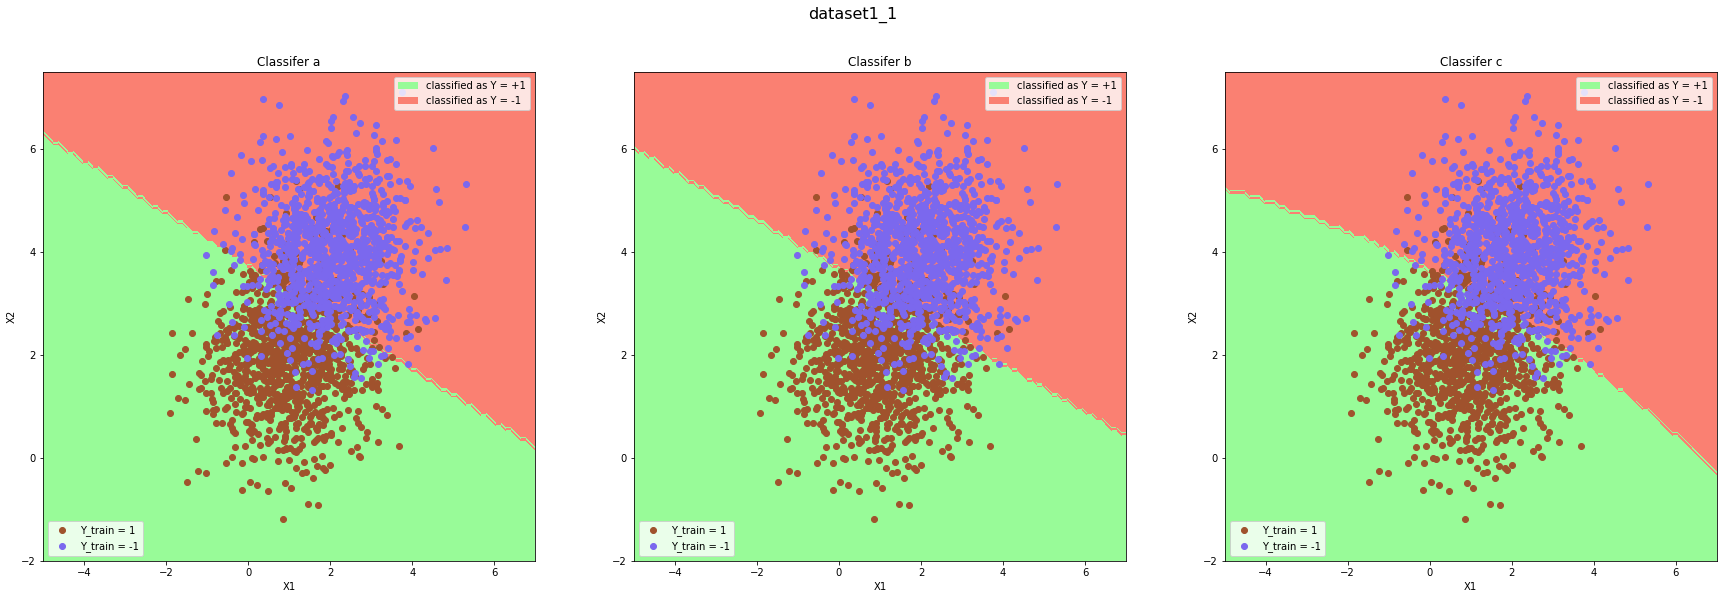

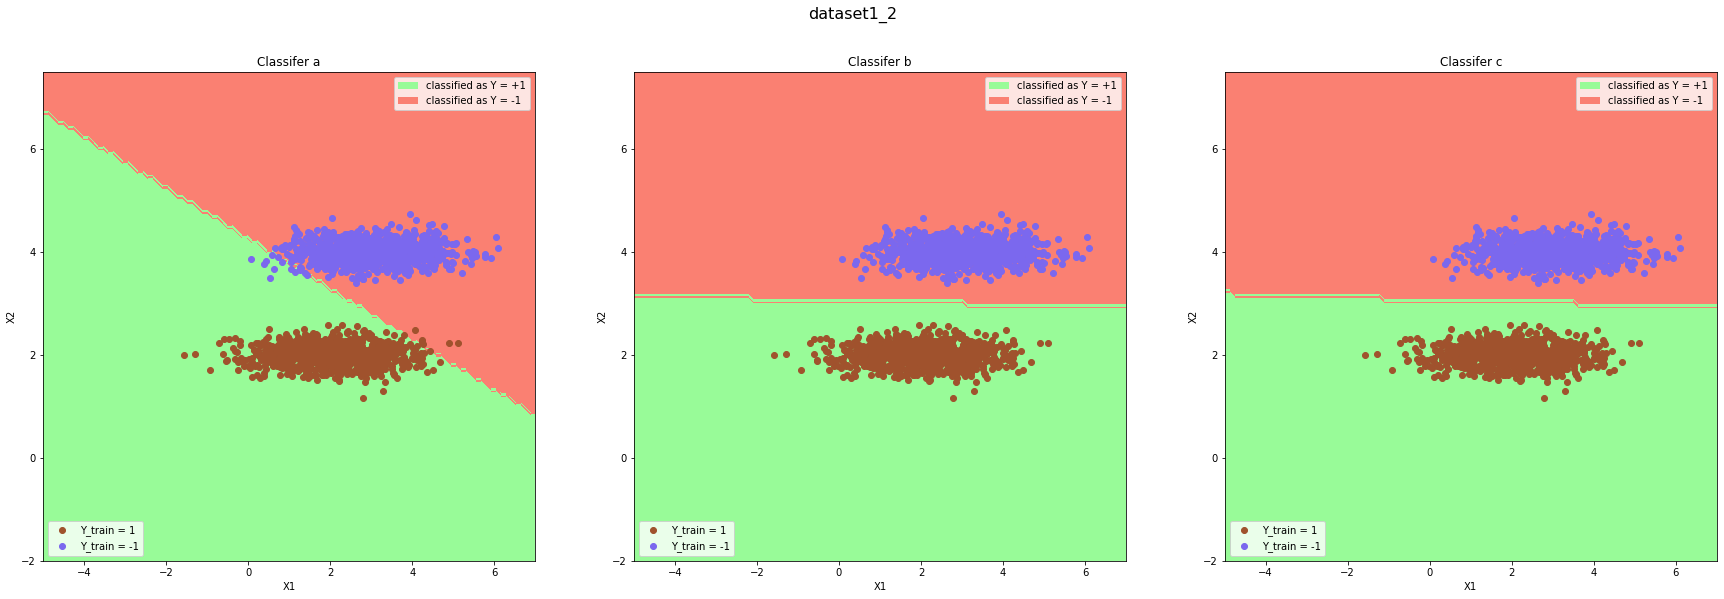

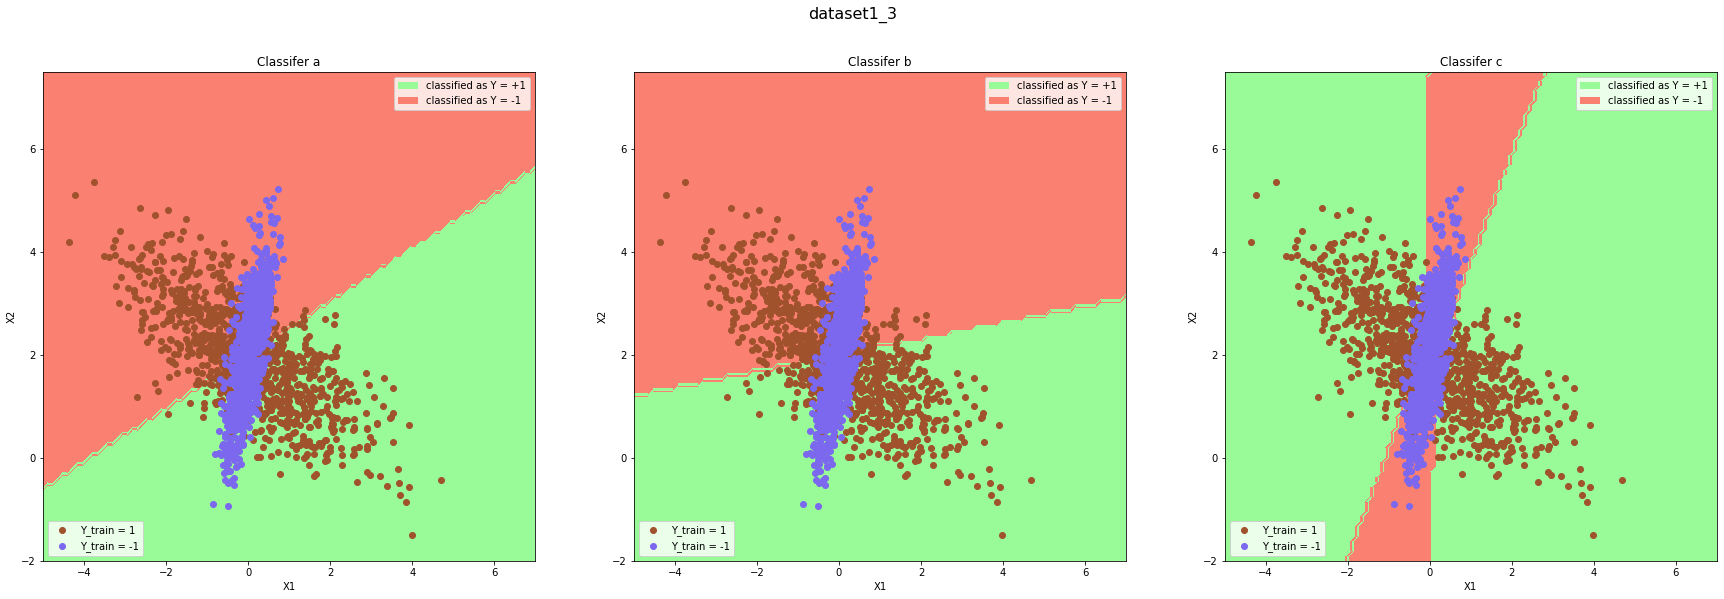

In [7]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)
X_train = dict()
Y_train = dict()
X_test  = dict()
Y_test  = dict()
for i in range(1,4):
    data = np.load("Data/dataset1_" +str(i)+".npz")
    X_train[i] = data['arr_0']
    Y_train[i] = data['arr_1']
    X_test[i]  = data['arr_2']
    Y_test[i]  = data['arr_3']

error = np.ndarray(shape=(3,3))

Bayes = {1:Bayes1a, 2:Bayes1b, 3:Bayes1c}

def calc_error(dataset, classifier):
    X_t   = X_train[dataset]
    Y_t   = Y_train[dataset]
    X_te  = X_test[dataset]
    Y_te  = Y_test[dataset]
    #print(X_t.shape)
    Y_pred = Bayes[classifier](X_t,Y_t, X_te)
    error[dataset-1][classifier-1] = np.sum(Y_pred != Y_te)/Y_te.shape[0]
    
for i in range(1,4):
    for j in range(1,4):
        calc_error(i,j)
#print(error)



for dataset_index in range(1,4):
    f, axs = plt.subplots(1, 3)
    axs = {'a': axs[0], 'b': axs[1], 'c': axs[2]}
    f.set_size_inches(30, 9, forward=True)
    f.suptitle('dataset1_' + str(dataset_index), fontsize=16)
    
    #xx, yy = np.meshgrid(np.arange(*axs['a'].get_xlim(), 0.05), np.arange(*axs['a'].get_ylim(), 0.05))
    # x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    # y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))  
    #X = np.c_[xx.ravel(), yy.ravel()]
    
    n1=100
    n2=100
    x1=np.linspace(-5,7,n1)
    x2=np.linspace(-2,7.5,n2)
    x1,x2=np.meshgrid(x1,x2)
    x1 = x1.reshape((n1*n2,1))
    x2 = x2.reshape((n1*n2,1))
    X = np.concatenate((x1,x2),axis=1)
    X1 =x1.reshape((n1,n2))
    X2 =x2.reshape((n1,n2))

    Y = {}
    Y[0] = Bayes1a(X_train[dataset_index], Y_train[dataset_index], X).reshape((n1,n2))
    Y[1] = Bayes1b(X_train[dataset_index], Y_train[dataset_index], X).reshape((n1,n2))
    Y[2] = Bayes1c(X_train[dataset_index], Y_train[dataset_index], X).reshape((n1,n2))

    ind = ['a', 'b', 'c']
    
    for i, ax in enumerate(axs.values()):
        #print(i)
        a = ax.contourf(X1, X2, Y[i], colors=['salmon', 'palegreen'])
        proxy = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) for pc in a.collections]
        contour_legend = ax.legend(proxy[::-1], ["classified as Y = +1", "classified as Y = -1"] , loc= "upper right")
        ax.add_artist(contour_legend)
        ax.set_ylabel("X2")
        ax.set_xlabel("X1") 
        ax.set_title(f"Classifer {ind[i]}") 
        X_train_positive = X_train[dataset_index][Y_train[dataset_index] == 1]
        X_train_negative = X_train[dataset_index][Y_train[dataset_index] == -1]
        ax.scatter(X_train_positive[:,0], X_train_positive[:,1], c='sienna', label='Y_train = 1')
        ax.scatter(X_train_negative[:,0], X_train_negative[:,1], c='mediumslateblue', label='Y_train = -1')
        ax.legend(loc = "lower left")
         
#plt.legend(loc = "upper left")
plt.show()

# for i in range(1,4):
#     for j in range(1,4):
#         print("dataset " + str(i) + " classifier " + str(j), end = " ")
#         print_error(i , j)
#     print()



** Cell type : TextWrite ** 
(Write your observations and table of errors here)

<br>

### Table of Errors

| Dataset     	| Bayes1a    	| Bayes1b    	| Bayes1c     	|
|-------------	|------------	|------------	|-------------	|
| 1_1         	| 0.126      	| 0.1245     	| 0.1245      	|
| 1_2         	| 0.0085     	| 0.0        	| 0.0         	|
| 1_3         	| 0.497      	| 0.495      	| 0.135       	|

<br>

### Observations

#### Classifier a
<ol>
   <li> Assumption $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. </li>
   <li> The decision boundary obtained is the line $w^Tx + b$, where $ w = \mu_1 - \mu_2$ and 
       $b = \dfrac{1}{2} \mu_1^T\mu_1 - \dfrac{1}{2} \mu_2^T\mu_2 + \ln(\frac{1-p}{p})$ </li>
</ol>

#### Classifier b
<ol>
   <li> Assumption $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$. </li>
   <li> The decision boundary obtained is the line $w^Tx + b$, where $ w = \mu_1 - \mu_2$ and 
       $b = \dfrac{1}{2} \mu_1^T \Sigma \mu_1 - \dfrac{1}{2} \mu_2^T \Sigma \mu_2 + \ln(\frac{1-p}{p})$ </li>
</ol>
</ol>
    
#### Classifier c
<ol>
   <li> Assumption $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$. </li>
   <li> The decision boundary obtained is quadratic in this case </li>
</ol>
</ol>
    
#### Overall
<ol>
<li>We observe that classifiers 1 and 2 have very close error rates on datasets 1_1 and 1_2.</li>
<li>We see that the data points in dataset 1_2 can be separated by a horizontal line. The decision boundary of classifier 1 is an inclined line. This is due to the assumption that the distribution is isotropic and each dimension has the same variance. However we see that the distribution is stretched and therefore each dimension will have different variance. The classifier two which consider a general covariance matrix is able to identify this as we have provision for including appropriate covariances</li>
<li>From the third column of the plot we can observe that the decision boundaries are linear for the datasets 1_1 and 1_2,as even though the model is capable of quadratic boundaries only the linear boundary is shown, which means that a linear boundary is able to classify. The error rates of classifier 3 are also very close to those of 1 and 2 on the datasets 1_1 and 1_2. </li>
<li> We see that classifier 3 performs significantly better on the dataset 1_3 compared to the other two. From the plot in row 3 and column 3, we can see that the data has a quadratic boundary. The classifiers 1 and 2 are not able to explain this as their boundaries are linear, and hence they perform poorly </li>
</ol>


** Cell type : TextRead ** 


# Problem 2 : Learning Multiclass Bayes Classifiers from data with Max. Likeli.

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. The $4\times 4$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below.

$L=\begin{bmatrix} 0 &1 & 2& 3\\ 1 &0 & 1& 2\\ 2 &1 & 0& 1\\ 3 &2 & 1& 0 \end{bmatrix}$ 

2a) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $I$.

2b) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma$.

2c) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma_a$.



In [8]:
# Cell type : CodeWrite
# Fill in functions in this cell
L = np.array([[0,1,2,3],[1,0,1,2],[2,1,0,1],[3,2,1,0]]).reshape((4,4))

def etai(x, pi, mu, sigma):
    mu = mu.reshape((mu.shape[0],1))
    det = np.linalg.det(sigma) ** 0.5
    sigmai = np.linalg.inv(sigma)
    x = x.reshape((x.shape[0], 1))
    xeff = (x - mu)
    #print(x.shape, mu.shape)
    nume = -(xeff.T @ sigmai @ xeff)/2
    return (pi * np.exp(nume)) / det

def getpred(eta):
    ls = eta.T @ L
    clas = np.argmin(ls) + 1
    return int(clas)

def getsigma(X, mu):
    return ((X - mu).T @ (X - mu))/X.shape[0]

def getmu(X):
    return np.sum(X, axis = 0)/X.shape[0]

def getx(X_train, Y_train, i):
    n = Y_train.shape[0]
    fi = lambda x: 1 if x == i else 0
    r_indicator = np.apply_along_axis(fi, 1, Y_train.reshape(n,1))
    X_i = X_train * r_indicator.reshape(n, 1)
    pi = np.sum(r_indicator)/n
    return pi, X_i[~np.all(X_i == 0, axis = 1)]

def predict(x, pis, mus, sigmas):
    eta = [0.0] * 4
    for i in range(4):
        eta[i] = (etai(x, pis[i], mus[i], sigmas[i])).item()
    eta = (np.array(eta)).reshape(4,1)
    #print(eta.shape)
    return getpred(eta)

def Bayes2a(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    d = X_train.shape[1]
    pis = dict()
    mus = dict()
    sigmas = dict()
    eta  = dict()
    for i in range(4):
        p, X = getx(X_train, Y_train, i+1)
        pis[i] = p
        mus[i] = getmu(X).reshape((d,1))
        sigmas[i] = np.identity(d)

    #clas = predict (x,pis, mus, sigmas)
    Y_test = np.array([predict (x,pis, mus, sigmas) for x in X_test])
    return Y_test



    
def Bayes2b(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    d = X_train.shape[1]
    pis = dict()
    mus = dict()
    sigmas = dict()
    eta  = dict()
    for i in range(4):
        p, X = getx(X_train, Y_train, i+1)
        pis[i] = p
        mus[i] = getmu(X)
        sigmas[i] = getsigma(X, mus[i]) * pis[i]
    
    sigma = np.zeros((d,d))
    for i in range(4):
        sigma += sigmas[i]
    for i in range(4):
        sigmas[i] = sigma
    clas = lambda x : predict (x,pis, mus, sigmas)
    return (np.apply_along_axis(clas, 1, X_test))

def Bayes2c(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    print(Y_pred_test_1a.reshape(100,20).tolist())
    """
    d = X_train.shape[1]
    pis = dict()
    mus = dict()
    sigmas = dict()
    eta  = dict()
    for i in range(4):
        p, X = getx(X_train, Y_train, i+1)
        pis[i] = p
        mus[i] = getmu(X)
        sigmas[i] = getsigma(X, mus[i])
    
    clas = lambda x : predict (x,pis, mus, sigmas)
    return (np.apply_along_axis(clas, 1, X_test))
    


    


In [9]:
# Cell type : Convenience

# Testing the functions above

# Data 1

mat1=np.array([[1.,0.],[0.,1.]])
mat2=np.array([[1.,0.],[0.,1.]])
mat3=np.array([[1.,0.],[0.,1.]])
mat4=np.array([[1.,0.],[0.,1.]])

X_train_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_train_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_train_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_train_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_train = np.concatenate((X_train_1, X_train_2, X_train_3, X_train_4), axis=0)
Y_train = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))


X_test_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_test_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_test_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_test_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_test = np.concatenate((X_test_1, X_test_2, X_test_3, X_test_4), axis=0)
Y_test = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))



Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
#print(Y_pred_test_2a.reshape(100,40).tolist())
Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
#print(Y_pred_test_2b.reshape(100,40).tolist())
Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)
#print(Y_pred_test_2c.reshape(100,40).tolist())




**Cell type : TextRead**

# Problem 2

2d) Run the above three algorithms (Bayes2a,2b and 2c), for the two datasets given (dataset2_1.npz, dataset2_2.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 2 datasets = 6 plots) on a 2d plot (color the 4 areas classified as 1,2,3 and 4 differently). Add the training data points also on the plot. Plots to be organised as follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 6 plots appropriately. 

In the next Textwrite cell, summarise your observations regarding the six learnt classifiers. Give the *expected loss* (use the Loss matrix given in the problem.) of the three classifiers on the two datasets (use X_test and Y_test) as 2x3 table, with appropriately named rows and columns. Also, give the 4x4 confusion matrix of the final classifier for all three algorithms and both datasets. 


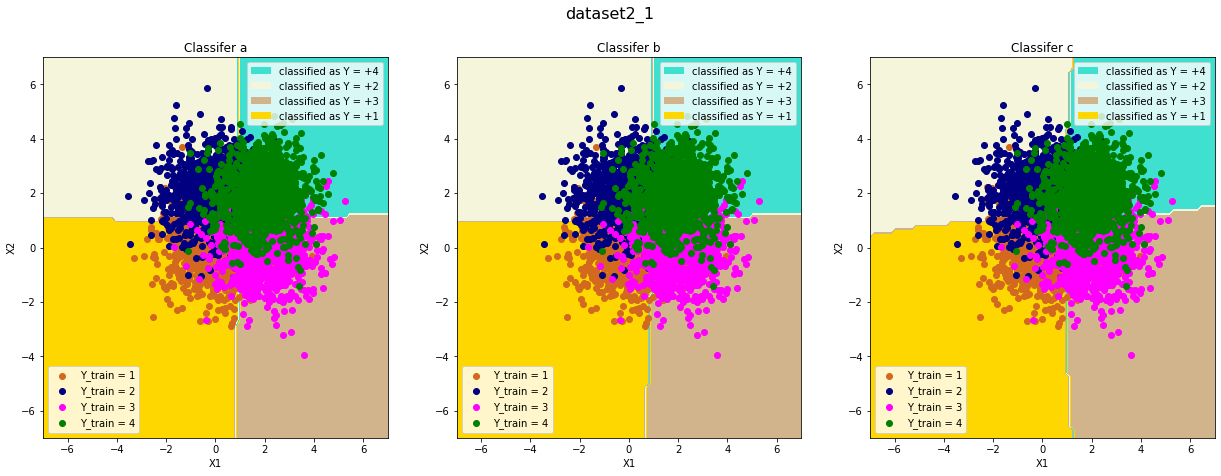

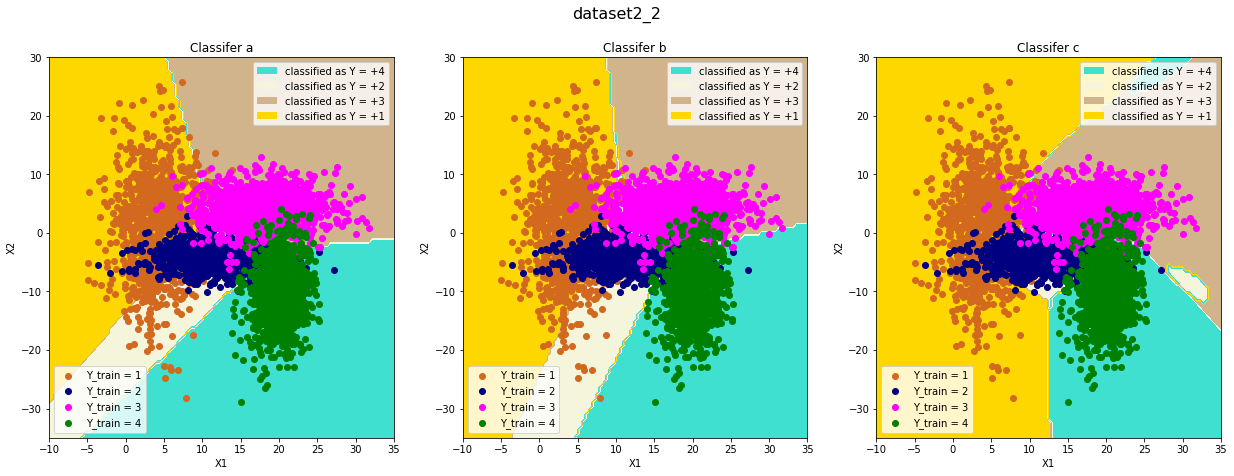

In [16]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)
X_train = dict()
Y_train = dict()
X_test  = dict()
Y_test  = dict()
for i in range(1,3):
    data = np.load("Data/dataset2_" +str(i)+".npz")
    #print(data.files)
    X_train[i] = data['arr_0']
    Y_train[i] = data['arr_1']
    X_test[i]  = data['arr_2']
    Y_test[i]  = data['arr_3']

error = np.ndarray(shape=(2,3))

Bayes = {1:Bayes2a, 2:Bayes2b, 3:Bayes2c}

# from sklearn.metrics import confusion_matrix
# from nltk import ConfusionMatrix

# from pandas import *

def calc_error(dataset, classifier):
    X_t   = X_train[dataset]
    Y_t   = Y_train[dataset]
    X_te  = X_test[dataset]
    Y_te  = Y_test[dataset]
    #print(X_t.shape)
    Y_pred = Bayes[classifier](X_t,Y_t, X_te)
    Loss = 0.0
    for i,j in zip(Y_pred, Y_te):
        #print(i,j)
        Loss += L[i-1][int(j)-1]
    #print(Y_te.shape, Y_pred.shape)
    # df = DataFrame(confusion_matrix(Y_te, Y_pred))
    # df.index = df.index + 1
    # print(df)
    #print(ConfusionMatrix(list(Y_te), list(Y_pred)))
    error[dataset-1][classifier-1] = (Loss/Y_te.shape[0]).round(5)
    
for i in range(1,3):
    for j in range(1,4):
        calc_error(i,j)

#error /= (np.sum(error, axis = 1)).reshape((2,1))
#print(error)

for dataset_index in range(1,3):
    f, axs = plt.subplots(1, 3)
    axs = {'a': axs[0], 'b': axs[1], 'c': axs[2]}
    f.set_size_inches(21, 7, forward=True)
    f.suptitle('dataset2_' + str(dataset_index), fontsize=16)
    
    #xx, yy = np.meshgrid(np.arange(*axs['a'].get_xlim(), 0.05), np.arange(*axs['a'].get_ylim(), 0.05))
    # x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    # y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))  
    #X = np.c_[xx.ravel(), yy.ravel()]
    
    n1=100
    n2=100
    x1=0
    x2=0
    if dataset_index == 1:
        x1=np.linspace(-7,7,n1)
        x2=np.linspace(-7,7,n2)
    else:
        x1=np.linspace(-10,35,n1)
        x2=np.linspace(-35,30,n2)

    x1,x2=np.meshgrid(x1,x2)
    x1 = x1.reshape((n1*n2,1))
    x2 = x2.reshape((n1*n2,1))
    X = np.concatenate((x1,x2),axis=1)
    X1 =x1.reshape((n1,n2))
    X2 =x2.reshape((n1,n2))

    Y = {}
    Y[0] = Bayes2a(X_train[dataset_index], Y_train[dataset_index], X).reshape((n1,n2))
    Y[1] = Bayes2b(X_train[dataset_index], Y_train[dataset_index], X).reshape((n1,n2))
    Y[2] = Bayes2c(X_train[dataset_index], Y_train[dataset_index], X).reshape((n1,n2))

    ind = ['a', 'b', 'c']
    
    for i, ax in enumerate(axs.values()):
        #print(i)
        a = ax.contourf(X1, X2, Y[i], colors = ['gold', 'tan', 'beige', 'turquoise'])
        proxy = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) for pc in a.collections]
        contour_legend = ax.legend(proxy[::-1], ["classified as Y = +4", "classified as Y = +2", "classified as Y = +3", "classified as Y = +1"] , loc= "upper right")
        ax.add_artist(contour_legend)
        ax.set_ylabel("X2")
        ax.set_xlabel("X1") 
        ax.set_title(f"Classifer {ind[i]}") 
        X_train_1 = X_train[dataset_index][Y_train[dataset_index] == 1]
        X_train_2 = X_train[dataset_index][Y_train[dataset_index] == 2]
        X_train_3 = X_train[dataset_index][Y_train[dataset_index] == 3]
        X_train_4 = X_train[dataset_index][Y_train[dataset_index] == 4]
        ax.scatter(X_train_1[:,0], X_train_1[:,1], c='chocolate', label='Y_train = 1')
        ax.scatter(X_train_2[:,0], X_train_2[:,1], c='navy', label='Y_train = 2')
        ax.scatter(X_train_3[:,0], X_train_3[:,1], c='magenta', label='Y_train = 3')
        ax.scatter(X_train_4[:,0], X_train_4[:,1], c='green', label='Y_train = 4')
        ax.legend(loc = "lower left")
         
#plt.legend(loc = "upper left")
plt.show()

** Cell type : TextWrite ** 
(Write your observations and table of errors here)
<br>

### Expected Loss

| Dataset 	| Bayes2a 	 | Bayes2b 	| Bayes2c 	|
|---------	|---------	 |---------	|---------	|
| 2_1     	| 0.42975  	 | 0.429  	| 0.42775  	|
| 2_2     	| 0.1835  	 | 0.1895  	| 0.14075  	|

<br>

### Confusion Matrix

<br>

#### Dataset 2_1


| Bayes2a          	| Predicted_1 	| Predicted_2 	| Predicted_3 	| Predicted_4 	|
|------------------	|-------------	|-------------	|-------------	|-------------	|
| Actual_1         	| 633         	| 219         	| 136         	| 12          	|
| Actual_2         	| 97          	| 738         	| 62          	| 103         	|
| Actual_3         	| 86          	| 49          	| 770         	| 95          	|
| Actual_4         	| 15          	| 136         	| 194         	| 655         	|

<br>

| Bayes2b          	| Predicted_1 	| Predicted_2 	| Predicted_3 	| Predicted_4 	|
|------------------	|-------------	|-------------	|-------------	|-------------	|
| Actual_1         	| 633         	| 218         	| 137         	| 12          	|
| Actual_2         	| 95          	| 743         	| 60          	| 102         	|
| Actual_3         	| 84          	| 49          	| 773         	| 94          	|
| Actual_4         	| 16          	| 137         	| 196         	| 651         	|

<br>

| Bayes2c          	| Predicted_1 	| Predicted_2 	| Predicted_3 	| Predicted_4 	|
|------------------	|-------------	|-------------	|-------------	|-------------	|
| Actual_1         	| 634         	| 217         	| 138        	| 11          	|
| Actual_2         	| 99         	| 742         	| 61          	| 98         	|
| Actual_3         	| 87          	| 47          	| 772         	| 94          	|
| Actual_4         	| 15          	| 134         	| 201         	| 650         	|

<br>

#### Dataset 2_2

| Bayes2a          	| Predicted_1 	| Predicted_2 	| Predicted_3 	| Predicted_4 	|
|------------------	|-------------	|-------------	|-------------	|-------------	|
| Actual_1         	| 830         	| 150         	| 18          	| 2           	|
| Actual_2         	| 93          	| 784         	| 46          	| 77          	|
| Actual_3         	| 30          	| 61          	| 905         	| 4           	|
| Actual_4         	| 0           	| 23          	| 78          	| 899         	|

<br>

| Bayes2b          	| Predicted_1 	| Predicted_2 	| Predicted_3 	| Predicted_4 	|
|------------------	|-------------	|-------------	|-------------	|-------------	|
| Actual_1         	| 891         	| 106         	| 3           	| 0           	|
| Actual_2         	| 119         	| 691         	| 124         	| 66          	|
| Actual_3         	| 23          	| 106         	| 864         	| 7           	|
| Actual_4         	| 0           	| 5           	| 102         	| 893         	|

<br>

| Bayes2c          	| Predicted_1 	| Predicted_2 	| Predicted_3 	| Predicted_4 	|
|------------------	|-------------	|-------------	|-------------	|-------------	|
| Actual_1         	| 901         	| 80         	| 19          	| 0           	|
| Actual_2         	| 64          	| 824         	| 46          	| 66          	|
| Actual_3         	| 19          	| 31          	| 936         	| 14          	|
| Actual_4         	| 0           	| 36          	| 48          	| 916         	|


### Observation 
#### Classifier a
<ol>
   <li> Assumption $X|Y=a \sim \mathcal{N}(\mu_a, I)$ </li>
   <li> The decision boundaries obtained are linear in this case </li>
</ol>

#### Classifier b
<ol>
   <li> Assumption $X|Y=a \sim \mathcal{N}(\mu_a, \Sigma)$. </li>
   <li> The decision boundaries obtained are linear in this case </li>
</ol>
</ol>
    
#### Classifier c
<ol>
   <li> Assumption $X|Y=a \sim \mathcal{N}(\mu_a, \Sigma_a)$ </li>
   <li> The decision boundaries obtained are quadratic in this case </li>
</ol>
</ol>
    
#### Overall
<ol>
<li> For Dataset 2_1 all 3 classifiers show an expected loss of $\approx $ 0.428. From the plot we can see that the data points corresponding to various classes overlap and it is impossible to obtain a classifier with 0 expected loss because of Bayes' error.
<li> Dataset 2_2 appears to be drawn from a distribution which satisfies the assumptions made by Bayes2c. The first two classifiers show higher expected loss because they both assume that every class conditional is drawn from a normal distribution with the same covariance matrix which doesn't seem true from the data. We can see that the plots of classes 1 and 4 are stretched whereas those of classes 2 and 3 are circular. This would lead to different magnitude of covariances. </li>
<li>The overlap between class conditionals seems to be less in Dataset2_2 than that in the first dataset. This means that the Bayes' error, which represents the intrinsic noise in the data, is smaller for this dataset which explains why we see a much smaller expected loss from all three classifiers on this dataset</li> 
</ol>

**Cell type : TextRead **

# Problem 3 : Bias-Variance analysis in regression

Do bias variance analysis for the following setting: 

$X \sim Unif([-1,1]\times[-1,1])$

$Y=\exp(-4*||X-a||^2) + \exp(-4*||X-b||^2) + \exp(-4*||X-c||^2)$

where $a=[0.5,0.5], b=[-0.5,-0.5], c=[0.5, -0.5]$.

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

Sample 50 (X,Y) points from above distribution, and do ridge regularised polynomial regression with degrees=[1,2,4,8,16] and regularisation parameters ($\lambda$) = [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]. Repeat for 100 times, and estimate the bias and variance for all 5*6=30 algorithms. You may approximate the distribution over X by discretising the $[-1,1]\times[-1,1]$ space into 10000 points. (Both expectations over S and (x,y) are simply estimates due to the finiteness of our experiments and sample)
 
3a) For each of the 30 algorithms analyse the contour plot of the estimated $f_S$ for 3 different training sets. And the average $g(x) = E_S [f_S(x)]$. Write one function for doing everything in the code cell below. So, there are total of 5*6 plots, with each plot containing 4 sub-plots. Give appropriate titles and colorbars.

3b) In the next text cell, give the Bias and Variance computed as a 5x6 matrix, appropriately label the rows and columns. And give your conclusion in one or two sentences. 




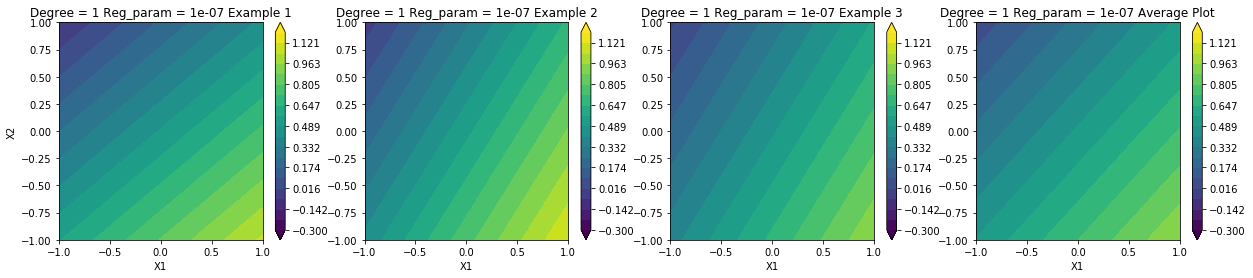

Degree= 1 lambda= 1e-07
Bias Squared = 0.05523317801833596
Variance = 0.00323240960633006
MSE = 0.05846558762466601


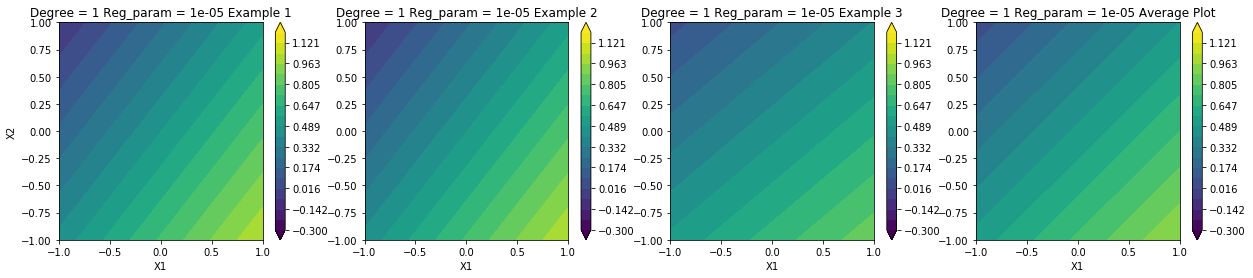

Degree= 1 lambda= 1e-05
Bias Squared = 0.05533705188759314
Variance = 0.004422879710223755
MSE = 0.059759931597816916


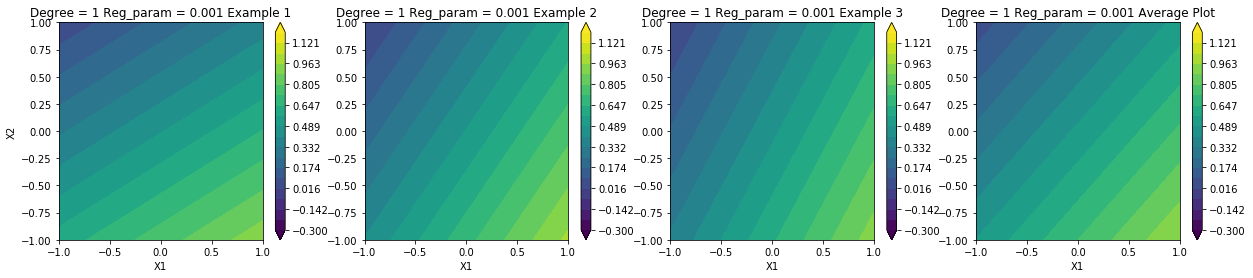

Degree= 1 lambda= 0.001
Bias Squared = 0.05531366965654004
Variance = 0.0035065965984594025
MSE = 0.058820266254999455


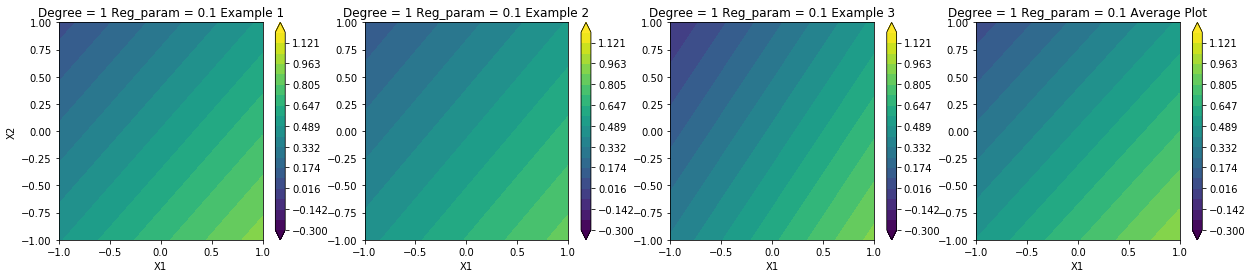

Degree= 1 lambda= 0.1
Bias Squared = 0.05515155282225055
Variance = 0.00358863942982617
MSE = 0.0587401922520767


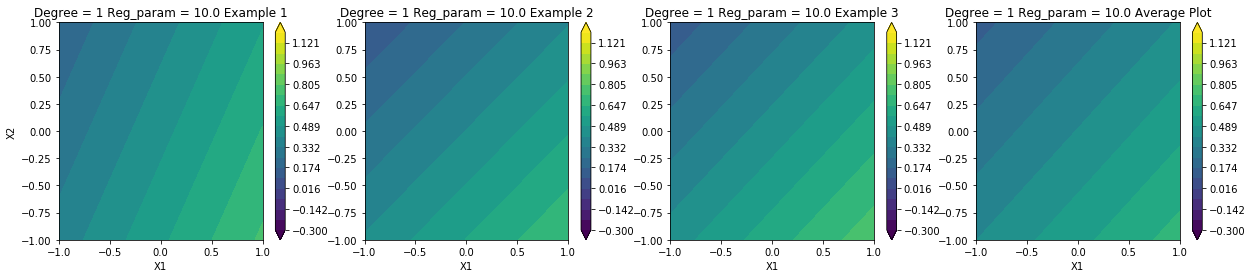

Degree= 1 lambda= 10.0
Bias Squared = 0.0662150772330024
Variance = 0.0016270990790479456
MSE = 0.06784217631205038


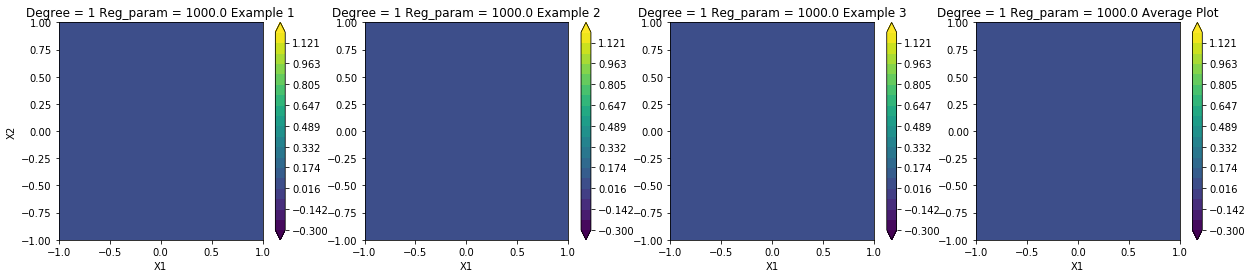

Degree= 1 lambda= 1000.0
Bias Squared = 0.30698993403458813
Variance = 6.322570095402635e-06
MSE = 0.3069962566046833


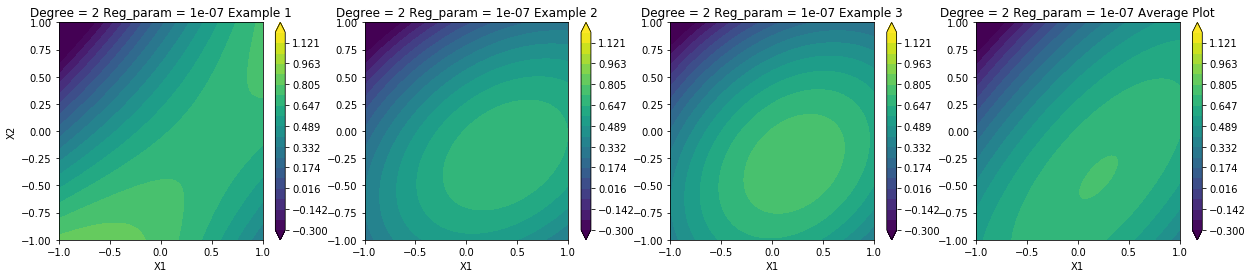

Degree= 2 lambda= 1e-07
Bias Squared = 0.035118848909506735
Variance = 0.006292261765788253
MSE = 0.041411110675294995


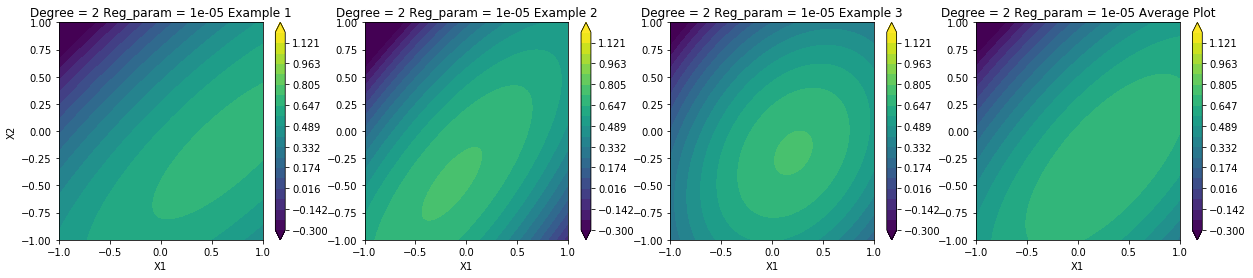

Degree= 2 lambda= 1e-05
Bias Squared = 0.03481436367659091
Variance = 0.0053954229791495405
MSE = 0.04020978665574046


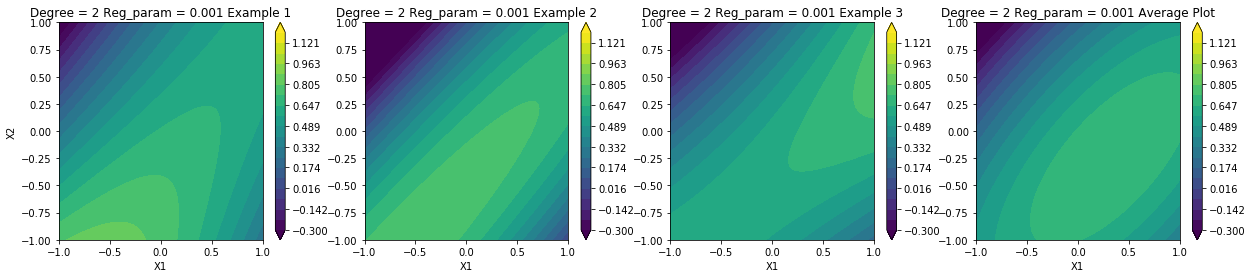

Degree= 2 lambda= 0.001
Bias Squared = 0.03479588397774791
Variance = 0.005789930736823313
MSE = 0.040585814714571226


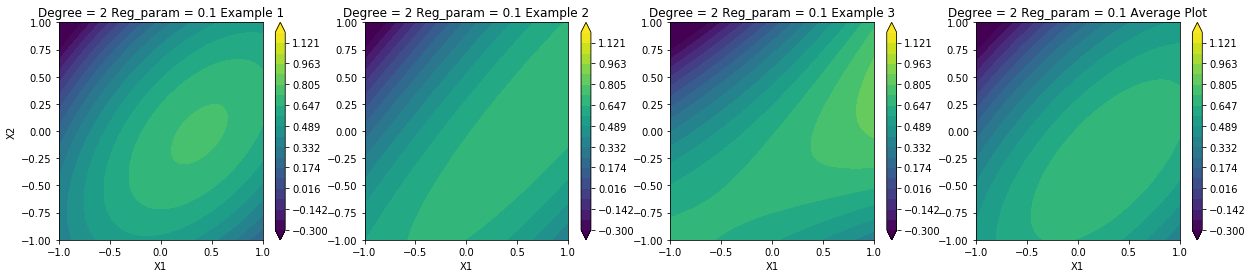

Degree= 2 lambda= 0.1
Bias Squared = 0.03459290317354089
Variance = 0.004687011048971352
MSE = 0.03927991422251224


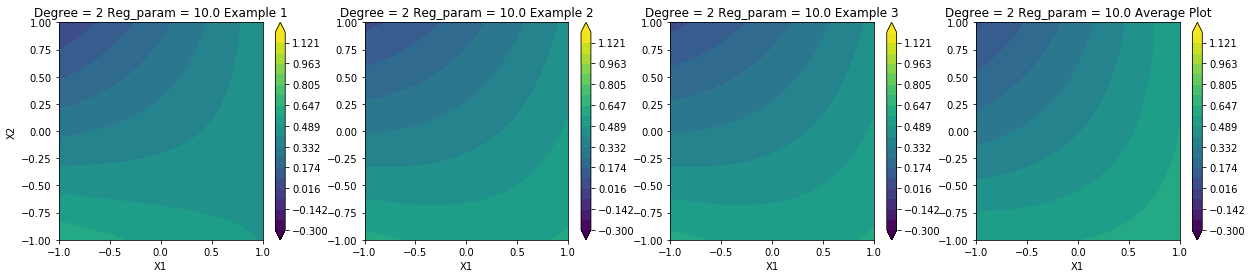

Degree= 2 lambda= 10.0
Bias Squared = 0.06139637432843333
Variance = 0.001852954515219389
MSE = 0.06324932884365267


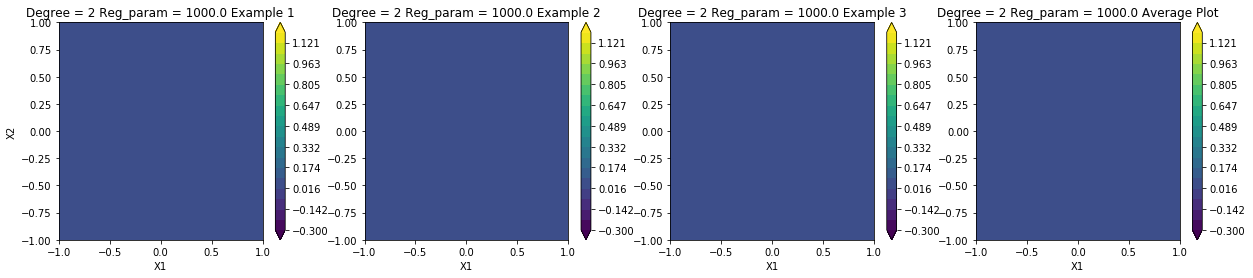

Degree= 2 lambda= 1000.0
Bias Squared = 0.3039716685726846
Variance = 6.610407212771587e-06
MSE = 0.3039782789798973


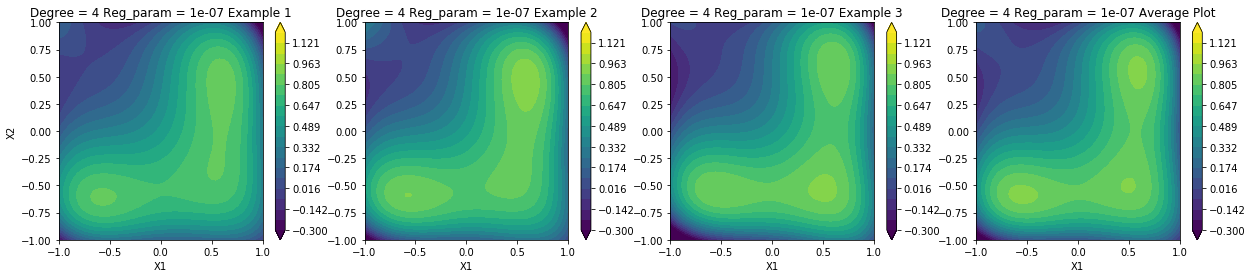

Degree= 4 lambda= 1e-07
Bias Squared = 0.008483058217070192
Variance = 0.008843669122260343
MSE = 0.017326727339330522


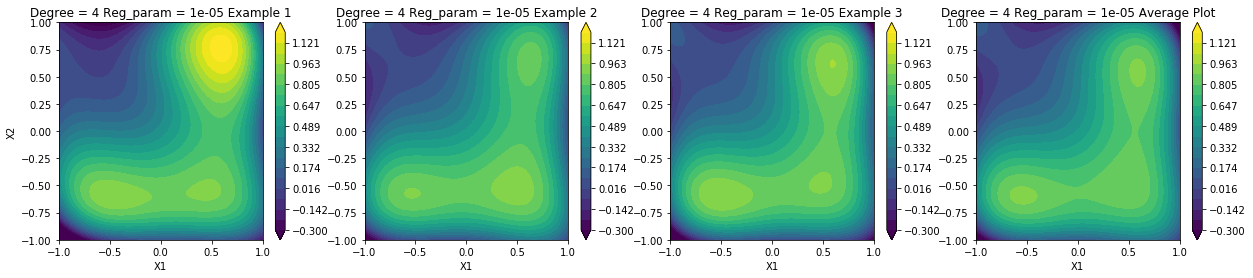

Degree= 4 lambda= 1e-05
Bias Squared = 0.007933827617774676
Variance = 0.008097297279289569
MSE = 0.016031124897064254


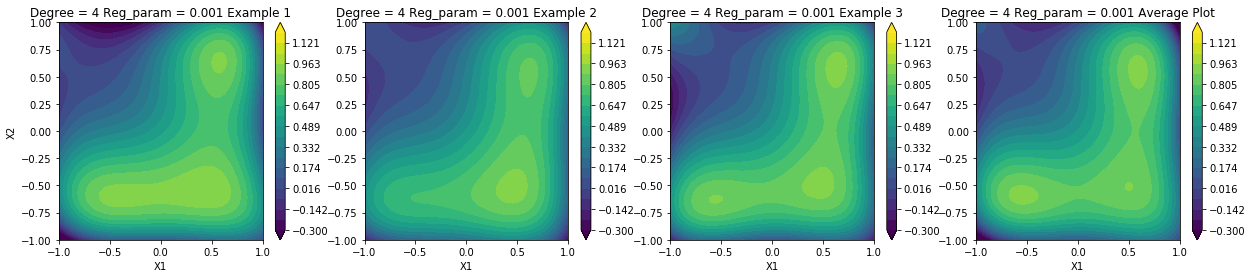

Degree= 4 lambda= 0.001
Bias Squared = 0.008026008714856493
Variance = 0.009753312548478332
MSE = 0.017779321263334827


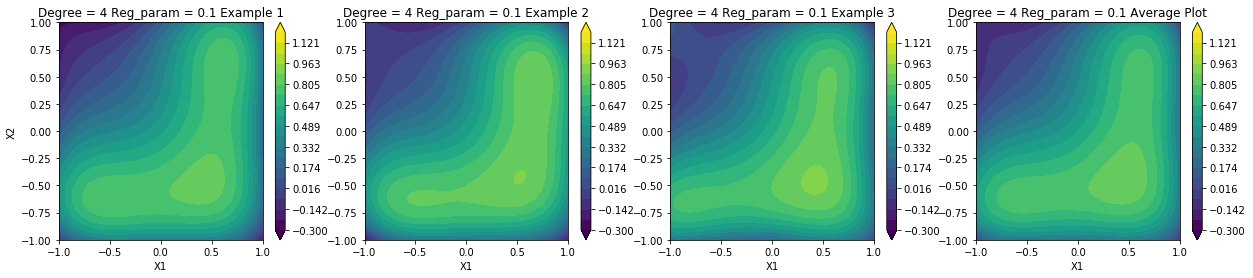

Degree= 4 lambda= 0.1
Bias Squared = 0.009218893662826622
Variance = 0.0039596852953176645
MSE = 0.013178578958144284


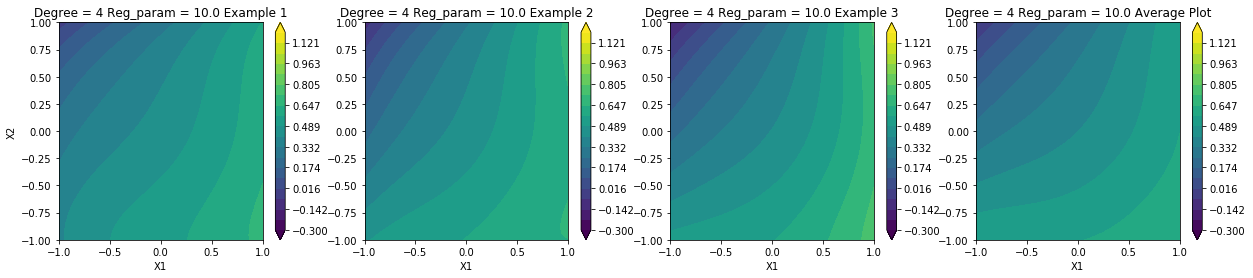

Degree= 4 lambda= 10.0
Bias Squared = 0.0595904287115187
Variance = 0.0024164863549890553
MSE = 0.06200691506650777


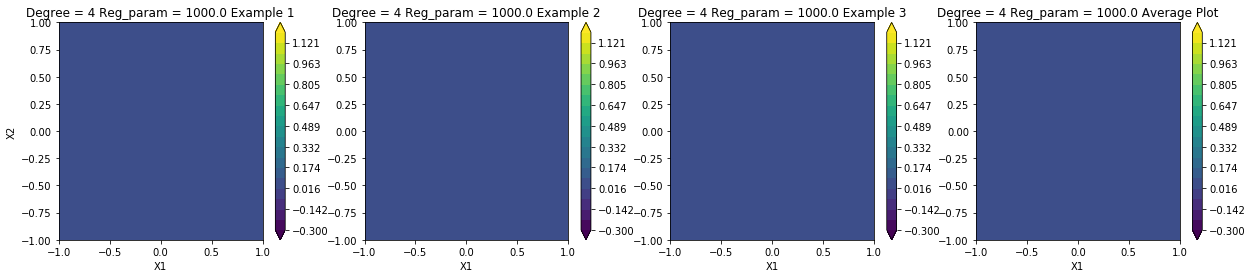

Degree= 4 lambda= 1000.0
Bias Squared = 0.30246159041811177
Variance = 1.0906619722830455e-05
MSE = 0.3024724970378345


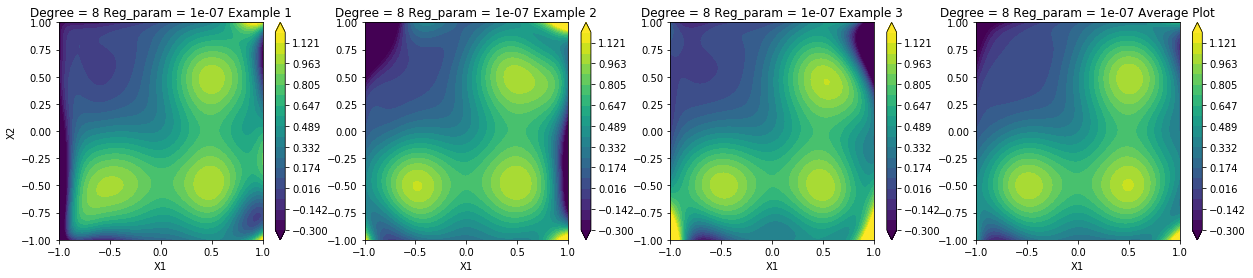

Degree= 8 lambda= 1e-07
Bias Squared = 0.009434425413747912
Variance = 0.19586616453400982
MSE = 0.2053005899477574


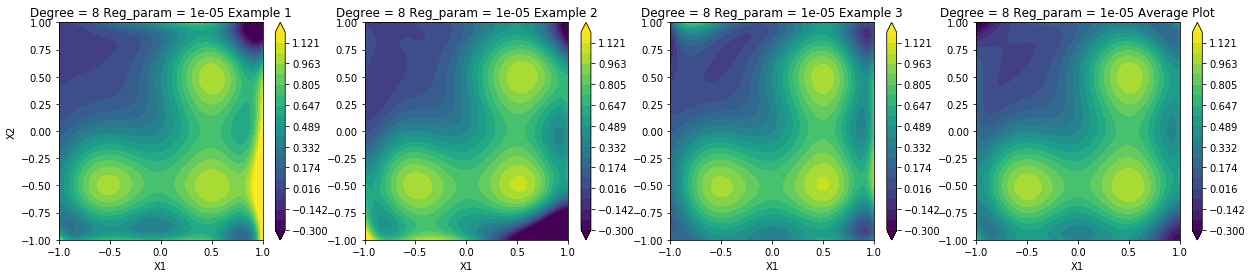

Degree= 8 lambda= 1e-05
Bias Squared = 0.0034615183159569895
Variance = 0.05412466524363061
MSE = 0.05758618355958761


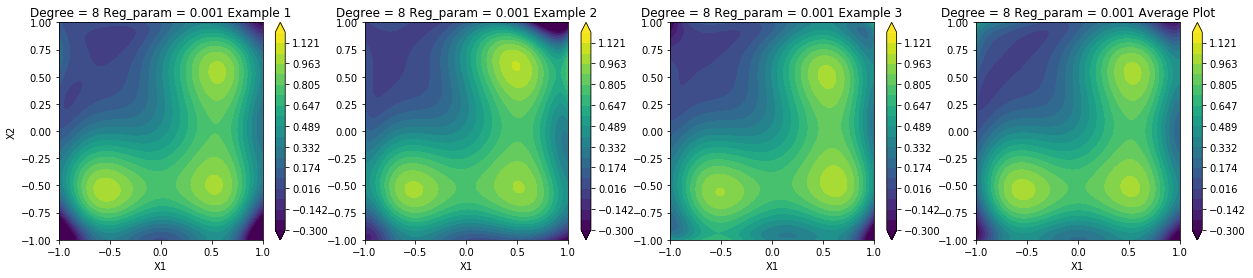

Degree= 8 lambda= 0.001
Bias Squared = 0.005907484487759086
Variance = 0.021938980961180195
MSE = 0.027846465448939258


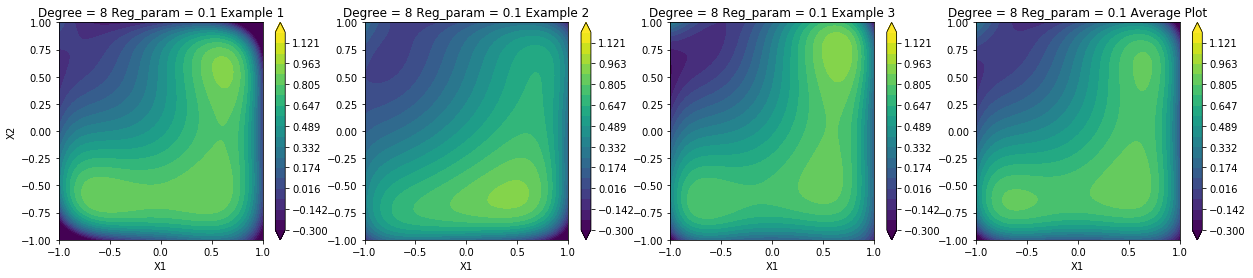

Degree= 8 lambda= 0.1
Bias Squared = 0.01013841317112311
Variance = 0.007197509630774424
MSE = 0.017335922801897528


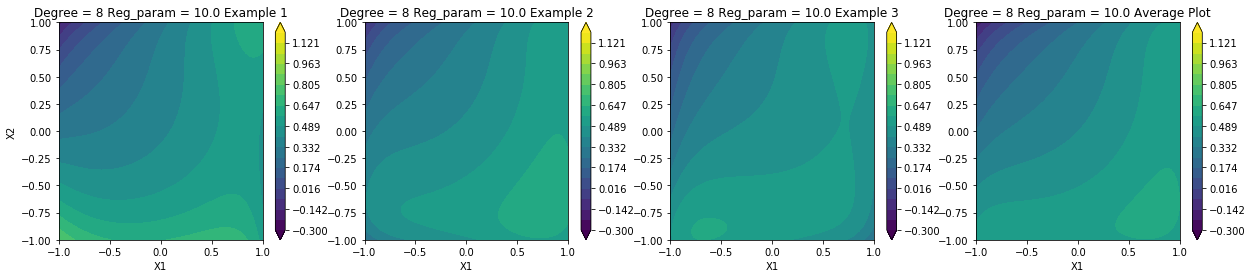

Degree= 8 lambda= 10.0
Bias Squared = 0.056504397242085135
Variance = 0.0022605170214174105
MSE = 0.058764914263502534


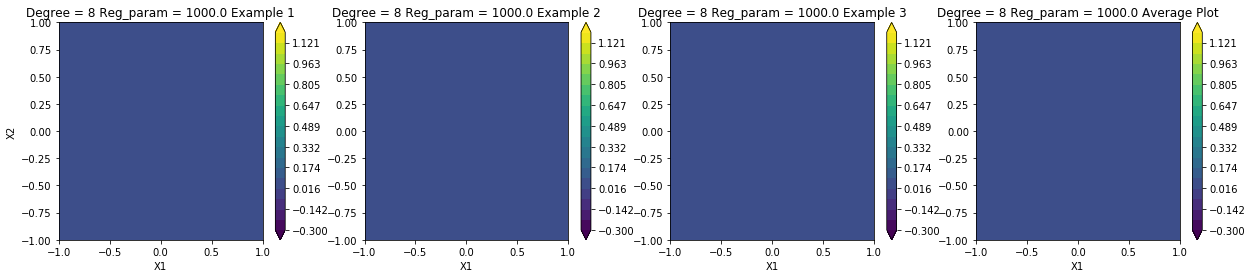

Degree= 8 lambda= 1000.0
Bias Squared = 0.3019621836877683
Variance = 1.2983004381562652e-05
MSE = 0.3019751666921498


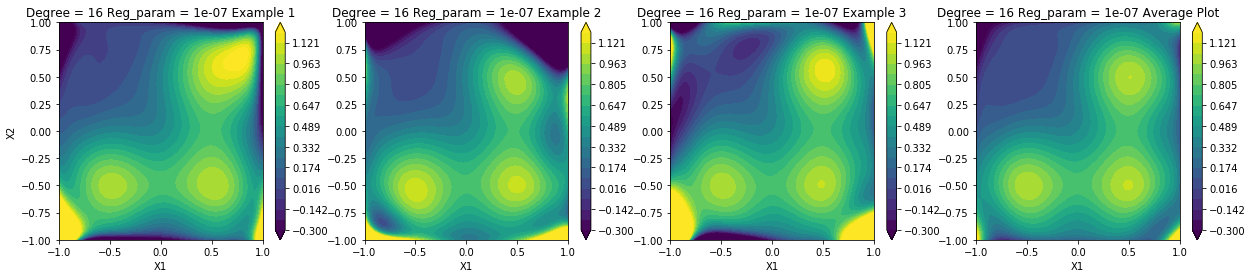

Degree= 16 lambda= 1e-07
Bias Squared = 0.013943374512728665
Variance = 0.34227714367580975
MSE = 0.35622051818853845


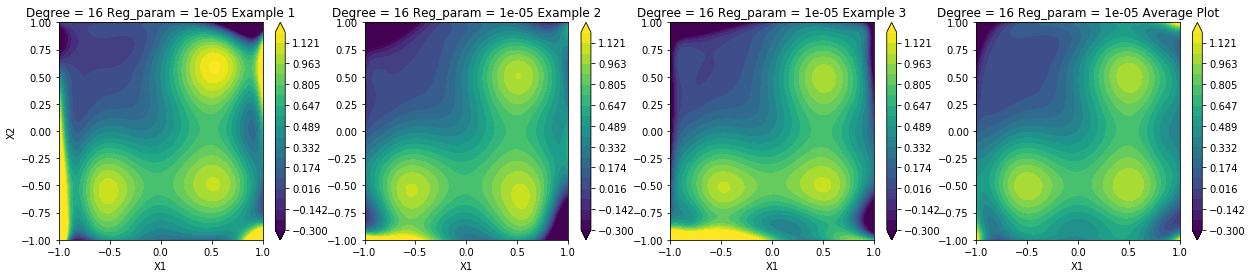

Degree= 16 lambda= 1e-05
Bias Squared = 0.014222499983714595
Variance = 0.16963590680541768
MSE = 0.18385840678913215


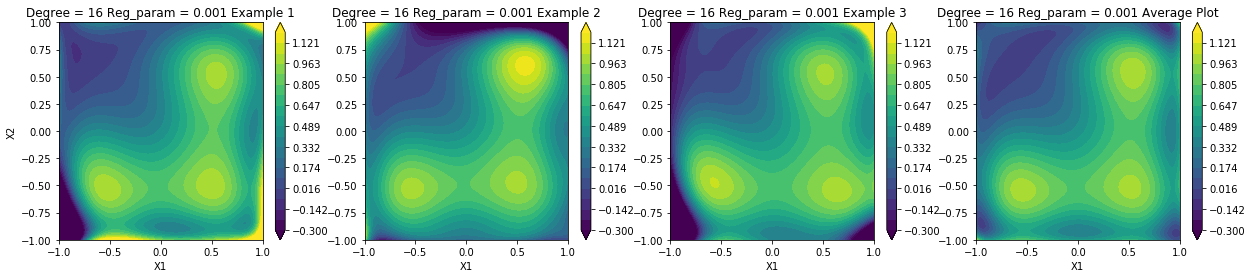

Degree= 16 lambda= 0.001
Bias Squared = 0.006487336616943623
Variance = 0.06218497416232704
MSE = 0.06867231077927068


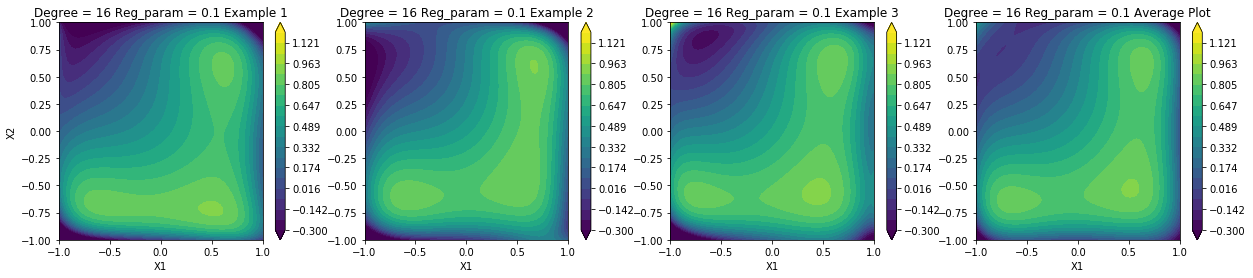

Degree= 16 lambda= 0.1
Bias Squared = 0.013146576871880365
Variance = 0.012304405634713798
MSE = 0.025450982506594163


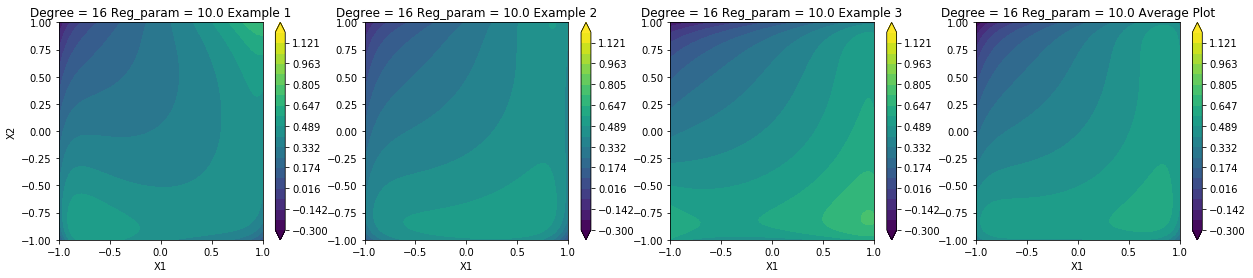

Degree= 16 lambda= 10.0
Bias Squared = 0.05403063306434933
Variance = 0.0025061592230355453
MSE = 0.056536792287384924


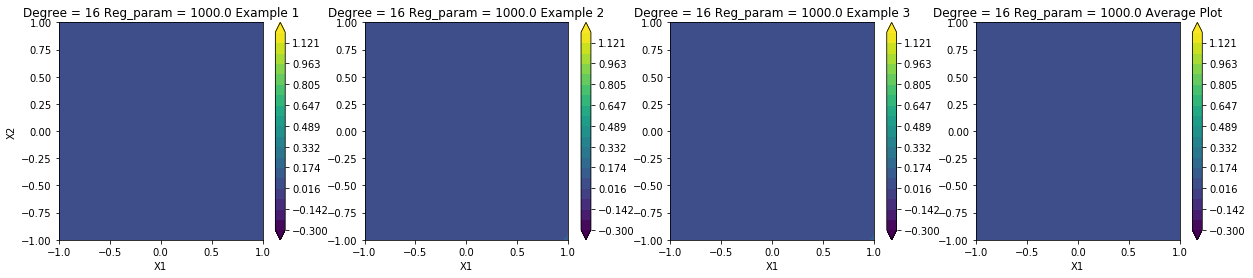

Degree= 16 lambda= 1000.0
Bias Squared = 0.30148038153271134
Variance = 1.5889726811383942e-05
MSE = 0.30149627125952266


In [15]:
# Cell type : CodeWrite
def getm(x, a):
    expt = -4 * (np.linalg.norm(x - a) ** 2)
    return np.exp(expt)

def getoutput(x):
    a = np.array([0.5,0.5])
    b = np.array([-0.5,-0.5])
    c = np.array([0.5,-0.5])
    return getm(x,a) + getm(x,b) + getm(x,c)


def appfeature(X, degree):
    nfeatures = int(((degree+2)*(degree+1))/2)
    x1 = X[:,0]
    x2 = X[:,1]
    ph = []
    for deg in range(0, degree + 1):
        for first in range(0, deg+1):
            ph.append((np.power(x1,first))* np.power(x2,(deg - first)))
    #print(ph.shape)
    return np.array(ph).T

def getphi(X, degree):
     #nfeatures = ((degree+2)*(degree+1))/2
    #pred = lambda x : appfeature(x, degree)
    #phi = np.apply_along_axis(pred, 1, X) 
    #phi = phi.reshape((phi.shape[0], phi.shape[2]))
    return appfeature(X, degree)

def polynomial_regression_ridge_pred(X_test, wt_vector, degree=1):
    """ Give the value of the learned polynomial function, on test data.

    For the sake of simplicity you may assume that the dimensionality of the data d=2.
    
    This should make you aware that feature vector mappings are quite complicated and 
    tedious in general.
    
    Arguments:
    X_test: numpy array of shape (n,d)
    wt_vec: numpy array of shape (d',)

    Returns:
    Y_test_pred : numpy array of shape (n,)
    
    """
    #nfeatures = ((degree+2)*(degree+1))/2
    #phi = np.array((0, nfeatures))
    #for i in range(X_test.shape[0]):
    #    phi = np.vstack(phi, appfeature(X_test[i], degree))
    #pred = lambda x : appfeatures(x, degree) 
    phi = getphi(X_test, degree)
    #np.apply_along_axis(pred, 1, X_test)
    #print(wt_vector.shape, )
    return phi @ wt_vector

    
    
def visualise_polynomial_2d(wt_vector, degree, title=""):
    """
    Give a contour plot over the 2d-data domain for the learned polynomial given by the weight vector wt_vector.
    
    """
    X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
    #print(X.shape, Y.shape)
    n1 = 100
    n2 = 100
    x1 = X.reshape((n1*n2,1))
    x2 = Y.reshape((n1*n2,1))
    X_t = np.concatenate((x1,x2),axis=1)
    X =x1.reshape((n1,n2))
    Y =x2.reshape((n1,n2))
    # Get Z using other functions
    Z = polynomial_regression_ridge_pred(X_t, wt_vector, degree).reshape((n1,n2))
    plt.contourf(X,Y,Z,levels=np.linspace(-0.3,1.2,20), extend = 'both')
    plt.title(title)
    plt.colorbar()
    #plt.ylabel("X2")
    plt.xlabel("X1") 
    
def polynomial_regression_ridge_train(X_train, Y_train, degree=1, reg_param=0.01):
    """ Give best polynomial fitting data, based on empirical squared error minimisation.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: numpy array of shape (n,)

    Returns:
    w : numpy array of shape (d',) with appropriate d'
    
    """
    phi = getphi(X_train, degree)
    n = Y_train.shape[0]
    d1 = phi.shape[1]
    #print(phi.shape)
    w = np.linalg.inv((phi.T @ phi) + reg_param*np.identity(d1)) @ phi.T @ Y_train
    return w
    
    
def compute_BV_error_sample_plot(degree, reg_param, num_training_samples=50):
    
    """Write code for generating data, fitting polynomial for given degree and reg_param. 
    Use num_training_samples samples for training.
        
    Compute the $f_S$ of 100 runs. 

    Plot 3 examples of learned function to illustrate how learned function varies 
    with different training samples. Also plot the average $f_S$ of all 100 runs.
    
    In total 4 subplots in one plot with appropriate title including degree and lambda value.
    
    Fill code to compute bias and variance, and average mean square error using the computed 100 $f_S$ functions.
    
    All contourplots are to be drawn with levels=np.linspace(0,1.2,20)
    
    Also return bias, variance, mean squared error. """

    nfeatures = int(((degree+2)*(degree+1))/2)
    
    avgfs = np.zeros((nfeatures))

    exrun = (np.random.choice(100, 3))
    ws = {}
    Xs = {}
    Ys = {}
    f = lambda x: getoutput(x)
    Y_all = np.empty((100, 10000))
    
    #avg function calculation
    for run in range(100):
        x1 = (np.random.uniform(-1,1,num_training_samples)).reshape(num_training_samples,1)
        x2 = (np.random.uniform(-1,1,num_training_samples)).reshape(num_training_samples,1)
        X = np.hstack((x1, x2))    
        Y = np.apply_along_axis(f, 1, X)
        w = polynomial_regression_ridge_train(X,Y, degree, reg_param)
        avgfs += w
        ws[run] = w
        Xs[run] = X
        Ys[run] = Y
    
    avgfs /= 100
    
    X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
    n1 = 100
    n2 = 100
    x1 = X.reshape((n1*n2,1))
    x2 = Y.reshape((n1*n2,1))
    X_t    = np.concatenate((x1,x2),axis=1)
    Y_pred = polynomial_regression_ridge_pred(X_t, avgfs, degree)
    b,v,e = 0.0, 0.0, 0.0

    #MSE
    for run in range(100):
        X  = Xs[run]
        Y  = Ys[run]
        w  = ws[run]
        Yp = polynomial_regression_ridge_pred(X, w, degree)
        Yo = polynomial_regression_ridge_pred(X_t, w, degree)
        #print(Yo.shape)
        Y_all[run] = Yo.reshape(1,10000)
        #e += (np.sum((Yp - Y)**2)) / num_training_samples
        #print(Yp.shape)
        #b += (np.sum((g - Y)**2)) / num_training_samples
        #v += (np.sum((Yp - g)**2)) / num_training_samples
        

    plt.subplot(1,4,1)
    plt.ylabel("X2")
    plt.gcf().set_size_inches(21,4) 
    visualise_polynomial_2d(ws[exrun[0]], degree, title=f"Degree = {degree} Reg_param = {reg_param} Example 1")
    plt.subplot(1, 4, 2)
    visualise_polynomial_2d(ws[exrun[1]], degree, title=f"Degree = {degree} Reg_param = {reg_param} Example 2")
    plt.subplot(1, 4, 3)
    visualise_polynomial_2d(ws[exrun[2]], degree, title=f"Degree = {degree} Reg_param = {reg_param} Example 3")
    plt.subplot(1, 4, 4)
    visualise_polynomial_2d(avgfs, degree, title=f"Degree = {degree} Reg_param = {reg_param} Average Plot")
    plt.show()
    Y = np.apply_along_axis(f, 1, X_t)
    b = np.mean((Y - Y_pred)**2)
    v = np.mean ((Y_all.T - Y_pred.reshape(10000,1))**2)
    e = np.mean ((Y_all.T - Y.reshape(10000,1))**2)
    return b,v,e
#i=0
B = np.empty((5,6))
V = np.empty((5,6))
E = np.empty((5,6))
for i, degree in enumerate([1,2,4,8,16]):
    for j, reg_param in enumerate([1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]):
        plt.figure()
        b,v,e = compute_BV_error_sample_plot(degree, reg_param)
        B[i][j] = b
        V[i][j] = v
        E[i][j] = e
        print('================================')
        print('Degree= '+str(degree)+' lambda= '+str(reg_param))
        #print('Bias = '+str(b ** 0.5))
        print('Bias Squared = '+str(b))
        print('Variance = '+str(v))
        print('MSE = '+str(e))
        #if j==0:
        #    break

    #if i==0: 
    #    break
        
#print(B)
#print(V)
#print(E)     
        

In [ ]:
# Cell type: convenience
#import pandas as pd 
pd.DataFrame(B.round(8)).to_csv("bias.csv")
print(B)
pd.DataFrame(V.round(8)).to_csv("variance.csv")
print(V)
pd.DataFrame(E.round(8)).to_csv("mse.csv")
print(E)
#print(Train_E)
#print(Y_test.shape)

** Cell type: TextWrite **
Give the biases and variances computed for the various algorithms with various degrees and lambdas and summarise your findings.

### Bias (Squared) Matrix
| Degree / Reg_param  	| $\lambda = 10^{-7}$ 	|  $\lambda = 10^{-5}$  	|  $\lambda = 10^{-3}$  	|  $\lambda = 10^{-1}$  	|  $\lambda = 10^{1}$  	|  $\lambda = 10^{3}$  	|
|---------------------	|---------------------	|-----------------------	|-----------------------	|-----------------------	|----------------------	|----------------------	|
| 1                   	| 0.0552075           	| 0.05516735            	| 0.05517118            	| 0.05519753            	| 0.06572061           	| 0.30761229           	|
| 2                   	| 0.03514785          	| 0.03505917            	| 0.03462884            	| 0.03481141            	| 0.06143698           	| 0.30370455           	|
| 4                   	| 0.0082954           	| 0.00825005            	| 0.007563              	| 0.0090408             	| 0.06021431           	| 0.30268422           	|
| 8                   	| 0.00833095          	| 0.00262613            	| 0.00371711            	| 0.0103194             	| 0.05536053           	| 0.30133494           	|
| 16                  	| 0.02789874          	| 0.01665144            	| 0.00550835            	| 0.01287619            	| 0.05387881           	| 0.30158787           	|

### Variance Matrix
| Degree / Reg_param  	|  $\lambda = 10^{-7}$  	|  $\lambda = 10^{-5}$  	|  $\lambda = 10^{-3}$  	|  $\lambda = 10^{-1}$  	|  $\lambda = 10^{1}$  	|  $\lambda = 10^{3}$  	|
|----------------------	|-----------------------	|-----------------------	|-----------------------	|-----------------------	|----------------------	|----------------------	|
| 1                    	| 0.00327979            	| 0.00436205            	| 0.00336176            	| 0.00401056            	| 0.00150549           	| 6.75e-06             	|
| 2                    	| 0.00576779            	| 0.00674359            	| 0.00497495            	| 0.0057703             	| 0.00168534           	| 8.61e-06             	|
| 4                    	| 0.00927724            	| 0.00923484            	| 0.00658832            	| 0.00362613            	| 0.00216295           	| 1.164e-05            	|
| 8                    	| 0.27393771            	| 0.0394253             	| 0.01580451            	| 0.0057194             	| 0.00223015           	| 1.276e-05            	|
| 16                   	| 0.41321493            	| 0.15953405            	| 0.05874876            	| 0.0146955             	| 0.00267142           	| 1.749e-05            	|

### Mean Squared Error (MSE) Matrix
| Degree / Reg_param  	|  $\lambda = 10^{-7}$  	|  $\lambda = 10^{-5}$  	|  $\lambda = 10^{-3}$  	|  $\lambda = 10^{-1}$  	|  $\lambda = 10^{1}$  	|  $\lambda = 10^{3}$  	|
|---------------------	|-----------------------	|-----------------------	|-----------------------	|-----------------------	|----------------------	|----------------------	|
| 1                   	| 0.05848729            	| 0.0595294             	| 0.05853294            	| 0.05920809            	| 0.0672261            	| 0.30761905           	|
| 2                   	| 0.04091564            	| 0.04180276            	| 0.03960379            	| 0.04058171            	| 0.06312233           	| 0.30371316           	|
| 4                   	| 0.01757264            	| 0.01748489            	| 0.01415132            	| 0.01266692            	| 0.06237726           	| 0.30269586           	|
| 8                   	| 0.28226866            	| 0.04205143            	| 0.01952162            	| 0.0160388             	| 0.05759068           	| 0.3013477            	|
| 16                  	| 0.44111367            	| 0.1761855             	| 0.06425712            	| 0.02757169            	| 0.05655023           	| 0.30160536           	|

<br>

### Observation
<ol>
<li> We observe that the bias decreases with increase in degree, and increases with increase in $ \lambda $ </li>
<li> We observe that the variance increases with increase in degree, and deccreases with increase in $ \lambda $ due to the effect of regularization </li>
    <li> The relation <b> MSE = Bias squared + Variance </b> holds within a reasonable level of accuracy </li>
<li> We see that the parameters degree = 4 and $ \lambda $ = 0.1 gives the least MSE = 0.01325 for this setting. We see that the plot is resembles the plot of the actual relation between X and Y of a multimodal Gaussian nature </li>
<li> We see that many of the contour plots have peaks at the points (0.5, 0.5), (0.5,-0.5), (-0.5, -0.5), which are the modes of the Gaussian functions which constitute Y </li>
<li> We can see that for high values of $ \lambda $ like 10 and 100 the MSE is practically constant as the bias is high and the variance is low </li>
<li> For very high values of $ \lambda $ like 1000, we can see that the values of the polynomial are very close to zero </li>
<li> An interesting observation is that in certain settings, the bias of the polynomial with degree 16 is higher than that of degree 8. This means that a sample size of 50 is insufficient to train a polynomial with such a high complexity </li>
 </ol>

** Cell type : TextRead **

# Problem 4 : Analyse overfitting and underfitting in Regression


Consider the 2-dimensional regression dataset "dateset4_1.npz". Do polynomial ridge regression for degrees = [1,2,4,8,16], and regularisation parameter $\lambda$ = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Do all the above by using four different subset sizes of the training set : 50, 100, 200 and 1000. (Just take the first few samples of X_train and Y_train.)

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

The lambda value is given by the regularisation parameter.

For each training set size compute how the train and test squared error varies with degree and regularisation parameter, via a 5x6 table (where $(i,j)^{th}$ entry corrosponds to $(degree, \lambda)$ ) with appropriate row and column headings. Compute the "best" degree and regularisation parameter based on the test squared error. Give a contour plot of the learned function for the chosen hyper-parameters, with appropriate title and labels . 

Summarise your findings in the next text cell in a few sentences. And reproduce the tables showing train and test error for various training sizes. You may reuse functions defined previously.




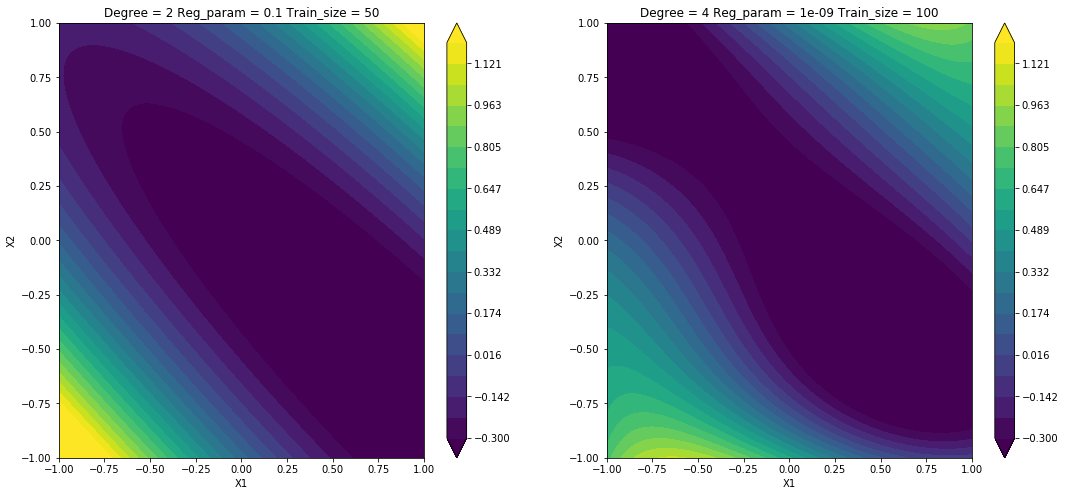

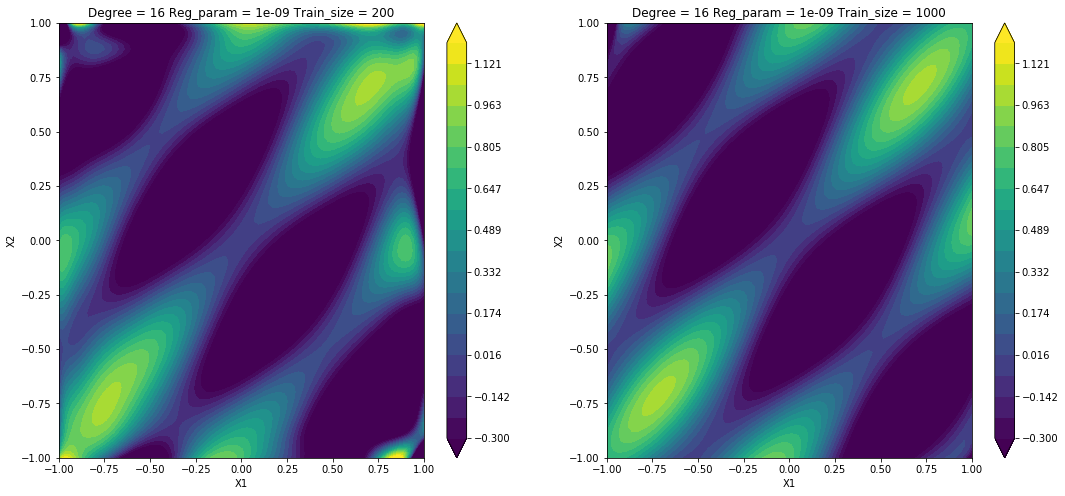

In [46]:
# Cell type : CodeWrite
#from pprint import pprint
data = np.load("Data/dataset4_1.npz") 
X_train = data['arr_0']
Y_train = data['arr_1']
X_test = data['arr_2']
Y_test = data['arr_3']
for num, train_size in enumerate([50,100,200,1000]):
    Train_E = np.empty((5,6))
    Test_E = np.empty((5,6))
    X_tr = X_train[:train_size]
    Y_tr = Y_train[:train_size]
    X_te = X_test
    Y_te = Y_test
    degs = [1,2,4,8,16]
    reg_params = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]
    for i, degree in enumerate(degs):
        for j, reg_param in enumerate(reg_params):
            w = polynomial_regression_ridge_train(X_tr,Y_tr, degree, reg_param)
            Ytr_pred = polynomial_regression_ridge_pred(X_tr, w, degree)
            Yte_pred = polynomial_regression_ridge_pred(X_te, w, degree)
            Train_E[i][j] = np.mean((Ytr_pred - Y_tr)**2)
            Test_E[i][j]  = np.mean((Yte_pred - Y_te)**2)
    l,m = np.unravel_index(Test_E.argmin(), Test_E.shape)
    best_degree = degs[l]
    best_reg_param = reg_params[m]
    if(num<2) :
        plt.subplot(1,2,num+1)
    else:
        plt.subplot(1,2,num-1)
    #plt.gcf().set_size_inches(8,18)
    plt.gcf().set_size_inches(18,8)
    plt.ylabel("X2")
    w = polynomial_regression_ridge_train(X_tr,Y_tr, best_degree, best_reg_param)
    visualise_polynomial_2d(w, best_degree, title=f"Degree = {best_degree} Reg_param = {best_reg_param} Train_size = {train_size}")
    if num%2:
        plt.show()
    # if num == 3:
    #     pd.DataFrame(Train_E.round(8)).to_csv("bv.csv")
    #     pd.DataFrame(Test_E.round(8)).to_csv("bvt.csv")
    #     print(Train_E)
    #     print(Test_E)


** Cell type : TextWrite **


### Train size = 50

#### Train Squared Error Matrix

| Degree / Reg_param 	|$\lambda = 10^{-9}$|$\lambda = 10^{-7}$|$\lambda = 10^{-5}$|$\lambda = 10^{-3}$|$\lambda = 10^{-1}$|$\lambda = 10^{1}$ |
|--------------------	|--------------	    |--------------	    |--------------	    |--------------	    |--------------	    |--------------	    |
| 1                  	| 0.25038312   	    | 0.25038312   	    | 0.25038312   	    | 0.25038312   	    | 0.25038442   	    | 0.25589783   	    |
| 2                  	| 0.1341116    	    | 0.1341116    	    | 0.1341116    	    | 0.13411161   	    | 0.13421306   	    | 0.1974827    	    |
| 4                  	| 0.10201831   	    | 0.10201831   	    | 0.10201831   	    | 0.10201946   	    | 0.10410665   	    | 0.18063793   	    |
| 8                  	| 0.00013273   	    | 0.00019916   	    | 0.01076578   	    | 0.04172134   	    | 0.08199099   	    | 0.1631997    	    |
| 16                 	| 2e-08        	    | 9.37e-06     	    | 0.00131769   	    | 0.03111309   	    | 0.07002071   	    | 0.15001286   	    |

#### Test Squared Error Matrix

| Degree / Reg_param 	|$\lambda = 10^{-9}$|$\lambda = 10^{-7}$|$\lambda = 10^{-5}$|$\lambda = 10^{-3}$|$\lambda = 10^{-1}$|$\lambda = 10^{1}$ |
|--------------------	|----------------	|----------------	|---------------	|--------------	    |--------------	    |--------------	    |
| 1                  	| 0.30126682     	| 0.30126682     	| 0.30126677    	| 0.3012625    	    | 0.30083822   	    | 0.27835069   	    |
| 2                  	| 0.15789999     	| 0.15789999     	| 0.15789985    	| 0.15788632   	    | 0.15673526   	    | 0.20822364   	    |
| 4                  	| 0.15733397     	| 0.15733396     	| 0.15733295    	| 0.15724278   	    | 0.16182639   	    | 0.1965686    	    |
| 8                  	| 237.69005721   	| 172.50186212   	| 18.59425393   	| 0.99025075   	    | 0.16515576   	    | 0.19391859   	    |
| 16                 	| 250.52242259   	| 232.02482829   	| 66.69768436   	| 2.33730833   	    | 0.20396146   	    | 0.19605732   	    |


### Train size = 100

#### Train Squared Error Matrix

| Degree / Reg_param 	|$\lambda = 10^{-9}$|$\lambda = 10^{-7}$|$\lambda = 10^{-5}$|$\lambda = 10^{-3}$|$\lambda = 10^{-1}$|$\lambda = 10^{1}$ |
|---------------------	|-------------	    |------------	    |-------------	    |-------------	    |-------------	    |-------------	    |
| 1                   	| 0.25809101   	    | 0.25809101   	    | 0.25809101   	    | 0.25809101   	    | 0.25809112   	    | 0.25873988   	    |
| 2                   	| 0.13095063   	    | 0.13095063   	    | 0.13095063   	    | 0.13095063   	    | 0.13096609   	    | 0.16496776   	    |
| 4                   	| 0.11302664   	    | 0.11302664   	    | 0.11302664   	    | 0.11302675   	    | 0.11365141   	    | 0.15237349   	    |
| 8                   	| 0.04158793   	    | 0.04158794   	    | 0.04168004   	    | 0.05800847   	    | 0.09290161   	    | 0.1448857    	    |
| 16                  	| 7.73e-06     	    | 0.00048397   	    | 0.00754402   	    | 0.04172918   	    | 0.08369694   	    | 0.13954384   	    |

#### Test Squared Error Matrix

| Degree / Reg_param 	|$\lambda = 10^{-9}$|$\lambda = 10^{-7}$|$\lambda = 10^{-5}$|$\lambda = 10^{-3}$ |$\lambda = 10^{-1}$|$\lambda = 10^{1}$ |
|--------------------	|-------------	    |-------------	    |-------------	    |-------------	     |-------------	    |-------------	     |
| 1                   	| 0.27314864    	| 0.27314864    	| 0.27314863    	| 0.27314798   	     | 0.27308304    	| 0.26862154       	 |
| 2                   	| 0.15320993    	| 0.15320993    	| 0.1532099     	| 0.15320678   	     | 0.15291576    	| 0.17570948       	 |
| 4                   	| 0.14277575    	| 0.14277576    	| 0.14277607    	| 0.14280764   	     | 0.14602043    	| 0.16898019       	 |
| 8                   	| 0.71291635    	| 0.71131963    	| 0.58075914    	| 0.20363826   	     | 0.16262758    	| 0.17116844       	 |
| 16                  	| 54.07992504   	| 11.77042012   	| 23.41658885   	| 0.41784851   	     | 0.18835914    	| 0.17415997       	 |


### Train size = 200

#### Train Squared Error Matrix

| Degree / Reg_param 	|$\lambda = 10^{-9}$|$\lambda = 10^{-7}$|$\lambda = 10^{-5}$|$\lambda = 10^{-3}$ |$\lambda = 10^{-1}$   |$\lambda = 10^{1}$ |
|--------------------	|-------------	    |-------------	    |-------------	    |-------------	     |-------------	        |-------------	    |
| 1                   	| 0.24653507   	    | 0.24653507   	    | 0.24653507   	    | 0.24653507    	 | 0.24653509   	    | 0.24664115   	    |
| 2                   	| 0.13366533   	    | 0.13366533   	    | 0.13366533   	    | 0.13366533    	 | 0.13366866   	    | 0.14754904   	    |
| 4                   	| 0.11333816   	    | 0.11333816   	    | 0.11333816   	    | 0.11333819    	 | 0.11358989   	    | 0.1444444    	    |
| 8                   	| 0.06173732   	    | 0.06173732   	    | 0.0617381    	    | 0.06394973    	 | 0.09568723   	    | 0.14119279   	    |
| 16                  	| 2.882e-05    	    | 0.00108543   	    | 0.01132556   	    | 0.04446327    	 | 0.08349957   	    | 0.1337626    	    |

#### Test Squared Error Matrix

| Degree / Reg_param 	|$\lambda = 10^{-9}$|$\lambda = 10^{-7}$|$\lambda = 10^{-5}$|$\lambda = 10^{-3}$ |$\lambda = 10^{-1}$   |$\lambda = 10^{1}$ |
|--------------------	|-------------	    |-------------	    |-------------	    |-------------	     |-------------	        |-------------	    |
| 1                   	| 0.26766305 	    | 0.26766305   	    | 0.26766305   	    | 0.26766288   	     | 0.26764571   	    | 0.26622547   	    |
| 2                   	| 0.14578065 	    | 0.14578065   	    | 0.14578065   	    | 0.14578035   	     | 0.14575448   	    | 0.15868223   	    |
| 4                   	| 0.13117097 	    | 0.13117097   	    | 0.1311709    	    | 0.13116415   	     | 0.13083053   	    | 0.15708512   	    |
| 8                   	| 0.13736299 	    | 0.13735918   	    | 0.13698205   	    | 0.11818259   	     | 0.11396536   	    | 0.15645118   	    |
| 16                  	| 0.03715016 	    | 0.08371021   	    | 0.17080666   	    | 0.0869037    	     | 0.11121403   	    | 0.15224401   	    |

### Train size = 1000

#### Train Squared Error Matrix

| Degree / Reg_param 	|$\lambda = 10^{-9}$|$\lambda = 10^{-7}$|$\lambda = 10^{-5}$|$\lambda = 10^{-3}$ |$\lambda = 10^{-1}$   |$\lambda = 10^{1}$ |
|--------------------	|-------------	    |-------------	    |-------------	    |-------------	     |-------------	        |-------------	    |
| 1                  	| 0.24072822   	    | 0.24072822   	    | 0.24072822   	    | 0.24072822   	     | 0.24072822   	    | 0.24072872   	    |
| 2                  	| 0.1388241    	    | 0.1388241    	    | 0.1388241    	    | 0.1388241    	     | 0.13882421   	    | 0.13971802   	    |
| 4                  	| 0.12501724   	    | 0.12501724   	    | 0.12501724   	    | 0.12501724   	     | 0.12502512   	    | 0.13417203   	    |
| 8                  	| 0.07674285   	    | 0.07674285   	    | 0.07674287   	    | 0.07684622   	     | 0.09483803   	    | 0.12843823   	    |
| 16                 	| 2.549e-05    	    | 0.00044513   	    | 0.00653349   	    | 0.03841534   	     | 0.08499258   	    | 0.12168732   	    |
 
#### Test Squared Error Matrix

| Degree / Reg_param 	|$\lambda = 10^{-9}$|$\lambda = 10^{-7}$|$\lambda = 10^{-5}$|$\lambda = 10^{-3}$ |$\lambda = 10^{-1}$   |$\lambda = 10^{1}$ |
|--------------------	|-------------	    |-------------	    |-------------	    |-------------	     |-------------	        |-------------	    |
| 1                  	| 0.26253465   	    | 0.26253465   	    | 0.26253465   	    | 0.26253465   	     | 0.2625346    	    | 0.2625303    	    |
| 2                  	| 0.14242932   	    | 0.14242932   	    | 0.14242932   	    | 0.14242945   	     | 0.14244207   	    | 0.14451885   	    |
| 4                  	| 0.12707963   	    | 0.12707963   	    | 0.12707964   	    | 0.12708121   	     | 0.12724209   	    | 0.14093659   	    |
| 8                  	| 0.08481274   	    | 0.08481261   	    | 0.08480025   	    | 0.08391324   	     | 0.09782269   	    | 0.13498892   	    |
| 16                  	| 0.00119773   	    | 0.00149007   	    | 0.01095719   	    | 0.04965813   	     | 0.0907374    	    | 0.1278209    	    |

### Best Hyperparameters

The best degree and regularisation parameter $ \lambda $ and their corresponding test squared error obtained for the various training sizes are as follows

| Training Size  	|  Degree  	|  $ \lambda $ 	| Test Squared Error 	|
|:--------------:	|:--------:	|:------------:	|--------------------	|
|       50       	|     2    	|   $10^{-1}$  	|     0.15673526     	|
|       100      	|     4    	|   $10^{-9}$  	|     0.14277575     	|
|       200      	|    16    	|   $10^{-9}$  	|     0.03715016     	|
|      1000      	|    16    	|   $10^{-9}$  	|     0.00119773     	|


### Observations
 
<ol>
<li> We see that when $ \lambda $ is small, the test set error is significantly large compared to the training set error (especially for the polynomials with higher degrees). This is because when the regularisation parameter has less magnitude, we overfit for the training set. </li>

<li> We observe that given a training set and the degree, the difference between the train error and the test error decreases as the training set size increases. </li>

<li> We see that increasing training set size decreases test error on an average. Therefore for the training set of size 1000, the 16 degree polynomial performs the best </li>

<li> We also see that when the training set is small the simpler model performs better as the least error for the training set size of 50 is given by a degree 2 polynomial. This is because for fitting a more complex model we need a larger amount of data </li>
</ol>



** Cell type : TextRead **

# Problem 5 : Bayesian Regression


Consider the 2-dimensional regression dataset with 4 training points given below:

(x1,   x2)   : y

(1.0, 2.0)  : 5.1

(2.0, 2.1)  : 6.1

(0.6, 1.5)  : 4.2

(1.1, 0.9)  : 2.9

Assume $Y_i=W.X_i + \epsilon_i$, where W is a random variable with prior distribution given by a Gaussian with mean $[\mu_1, \mu_2]$ and covariance given by $\tau^2*I$. The random variables $\epsilon_i$ are independent, and normally distributed with variance $\sigma^2$. For each of the settings below, give the contours of the prior distribution and posterior distribution of $W$ given the 4 data points. Plot using a contour map.

1. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=1$
2. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=1$
3. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=10$
4. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=10$
5. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=1$
6. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=1$
7. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=10$
8. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=10$

Repeat all the above experiments also with 400 data points, which are simply the 4 data points above repeated 100 times each.

A total of 16\*2 contour plots are to be given. 

Summarise your findings and conclusions in the final textcell.












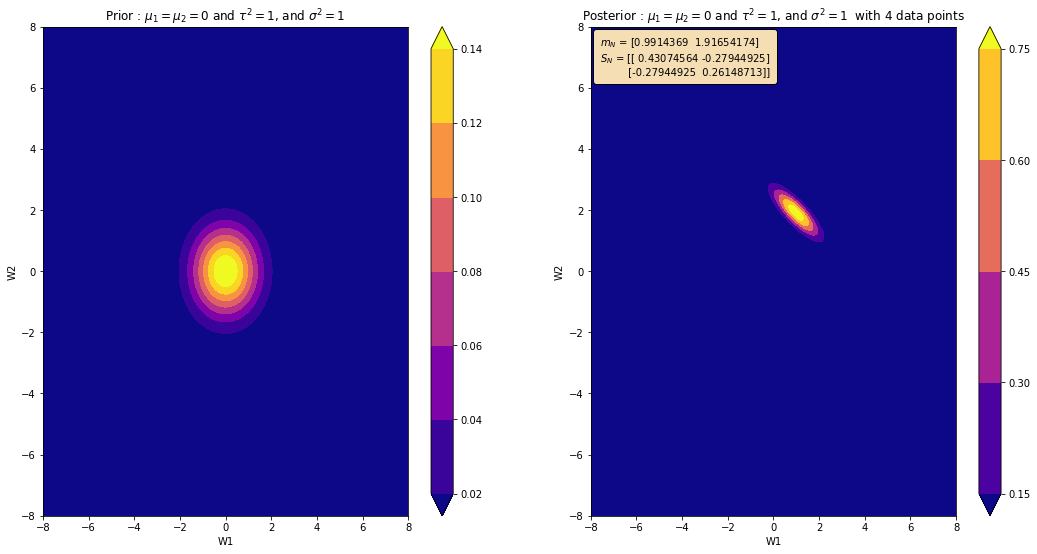

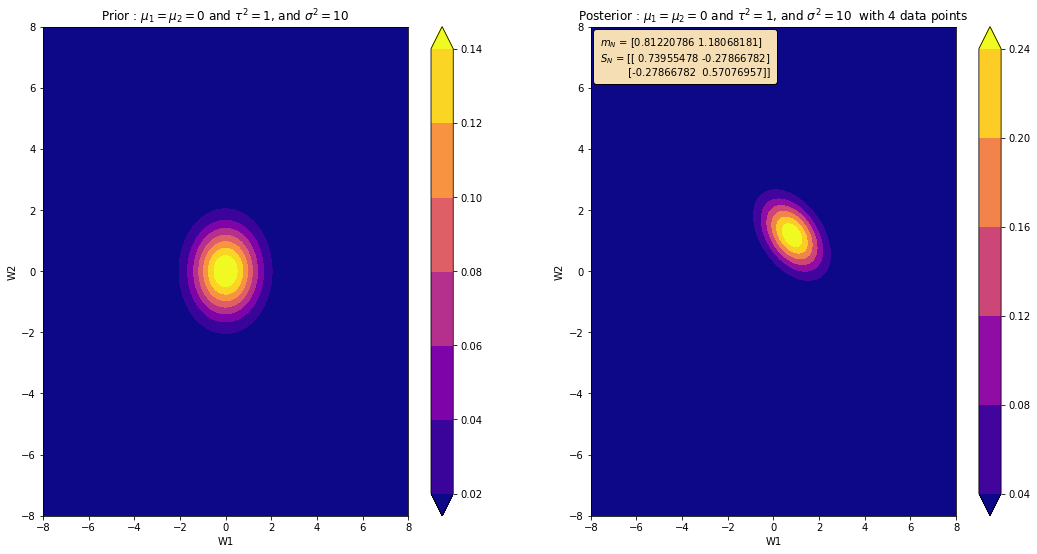

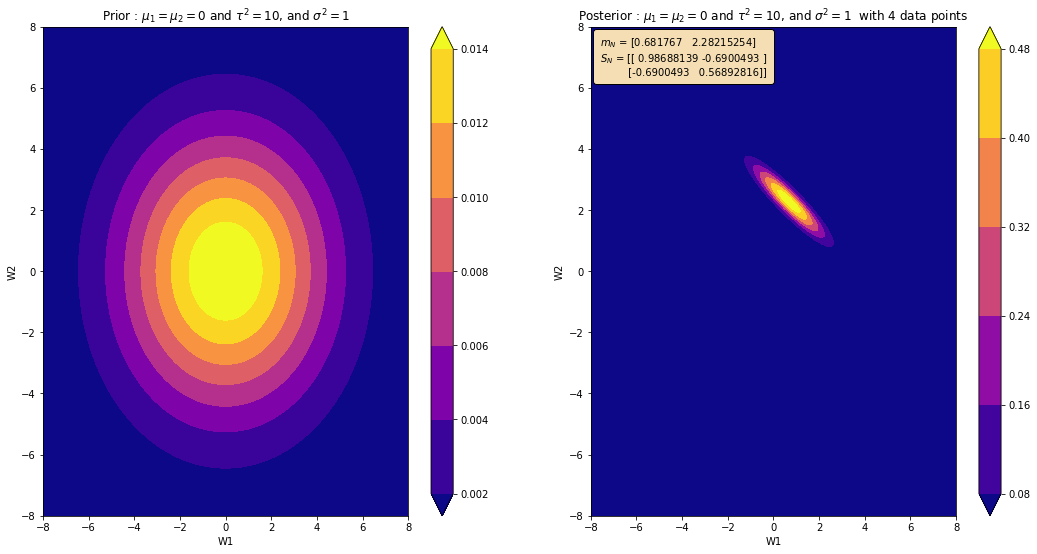

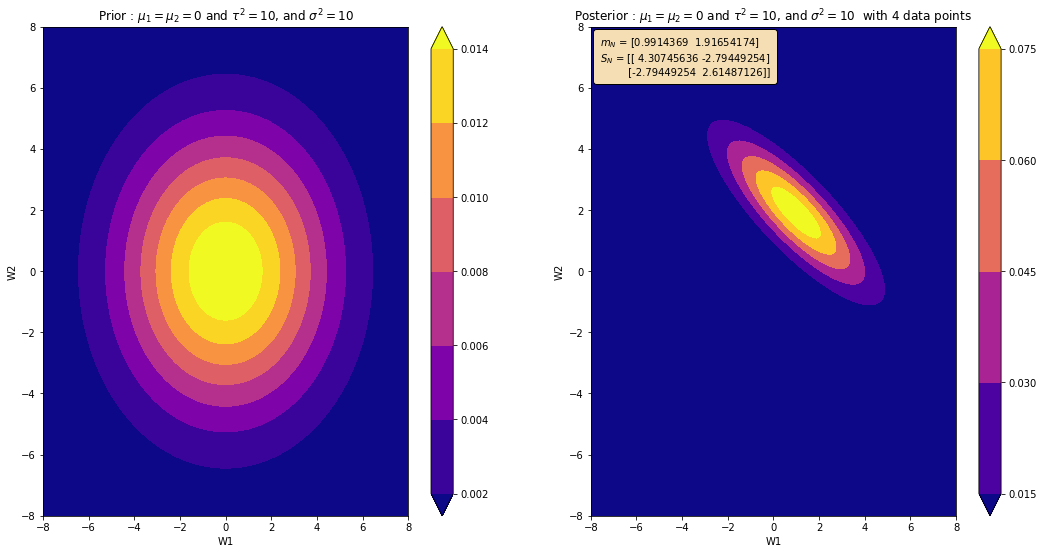

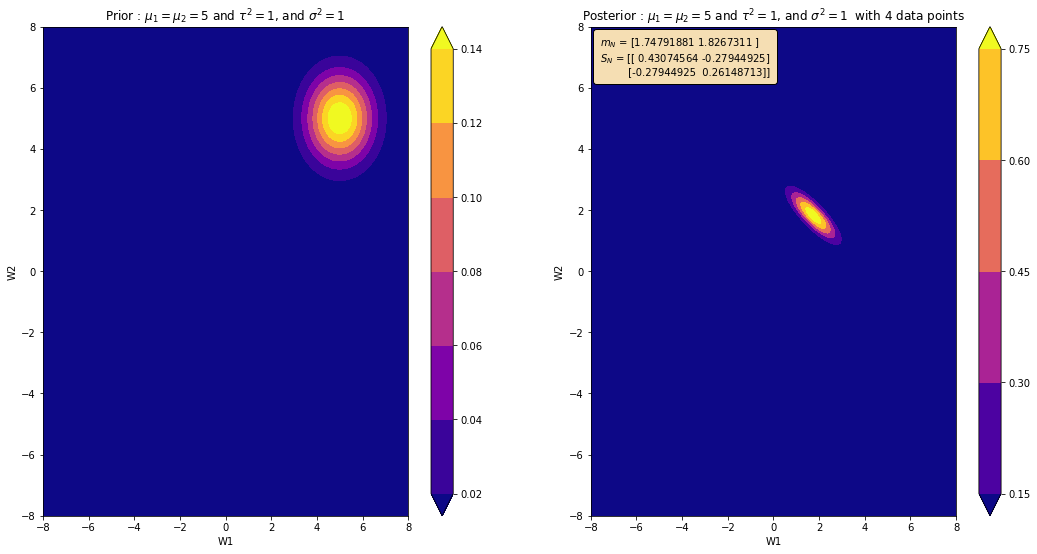

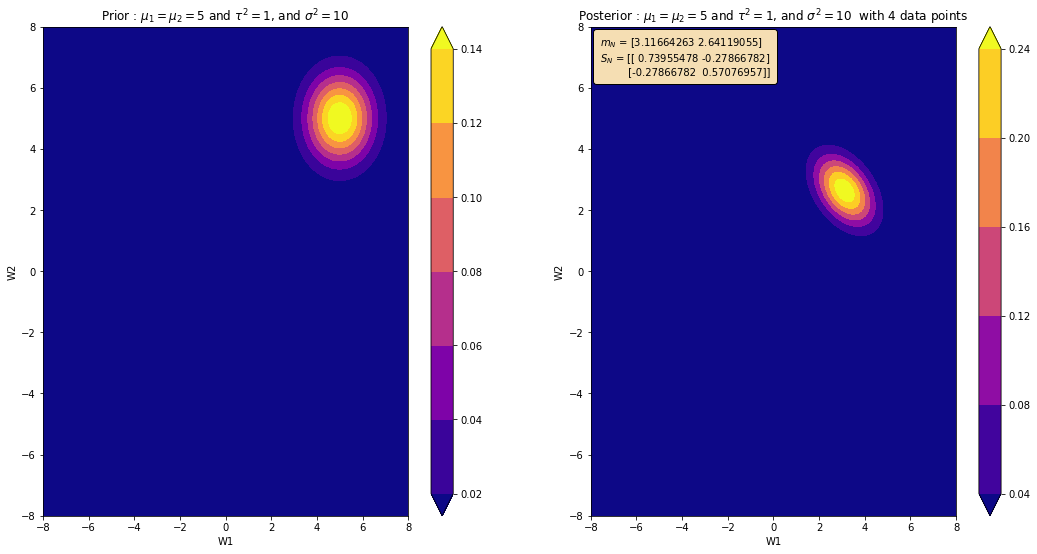

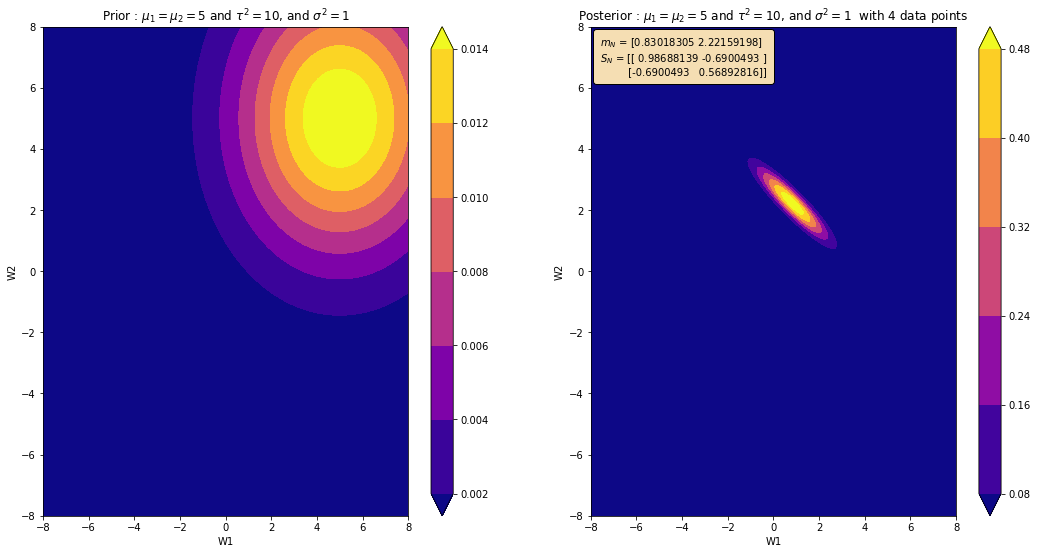

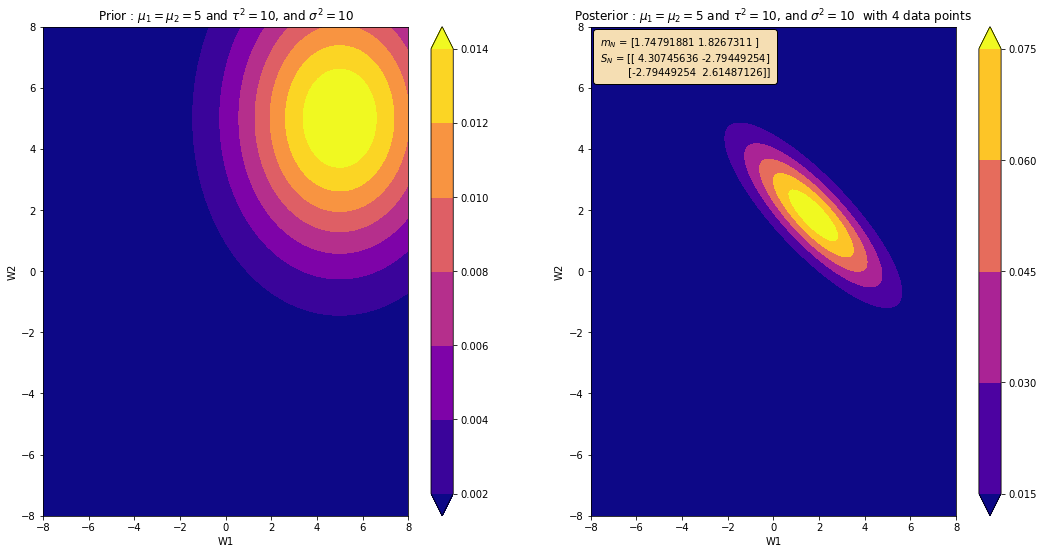

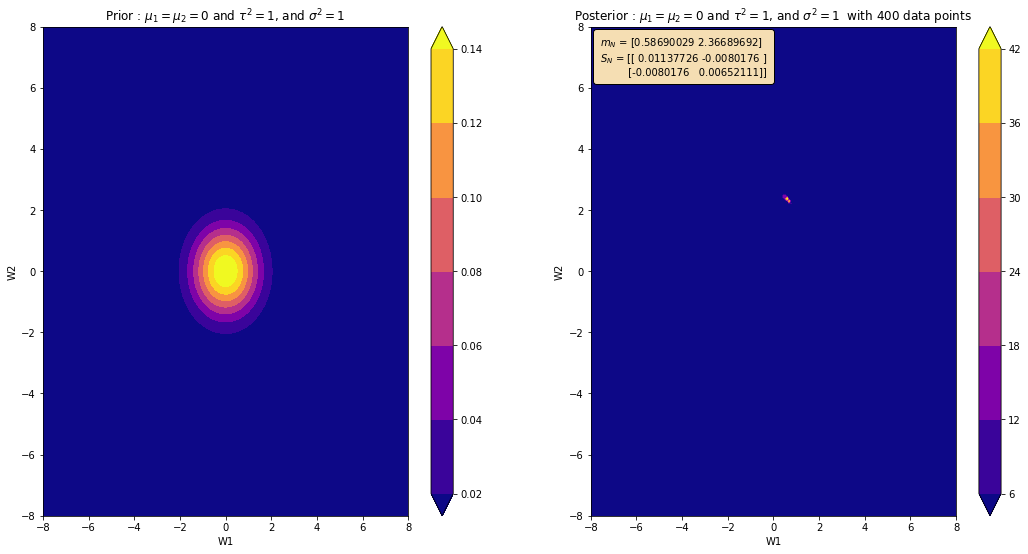

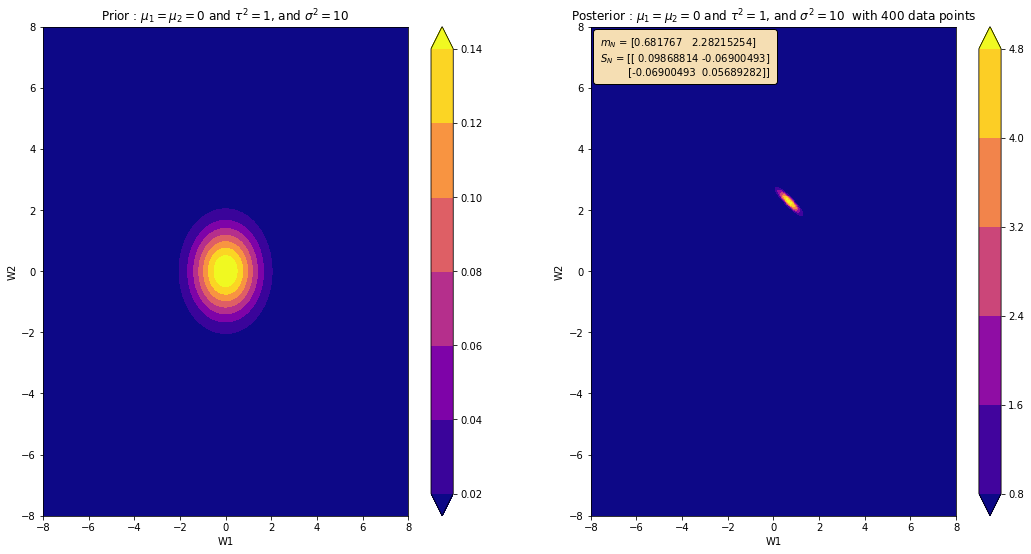

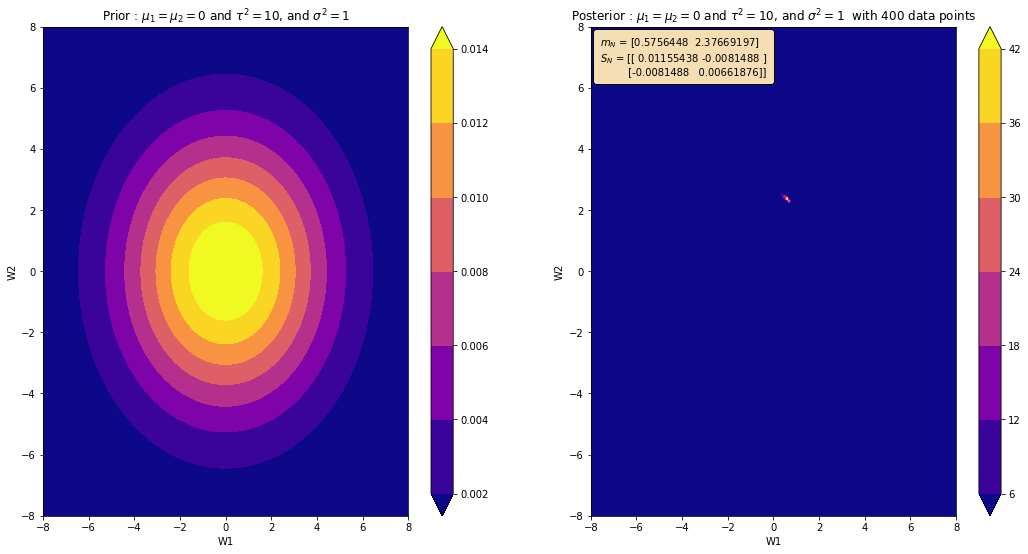

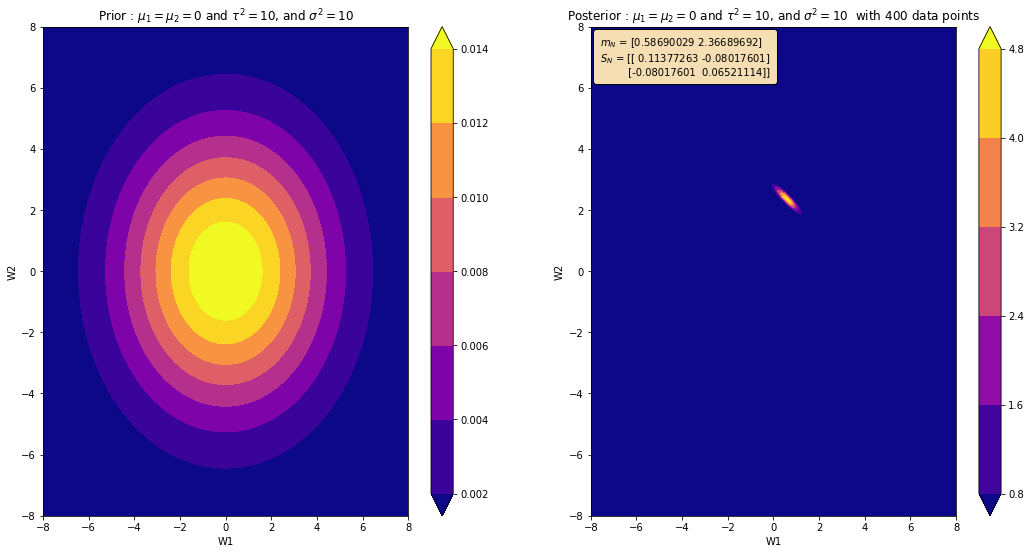

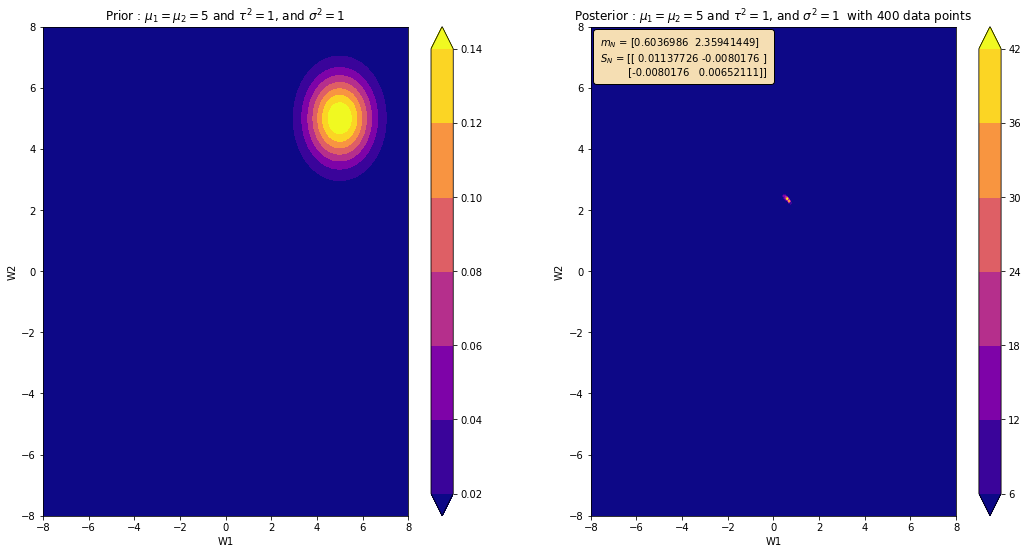

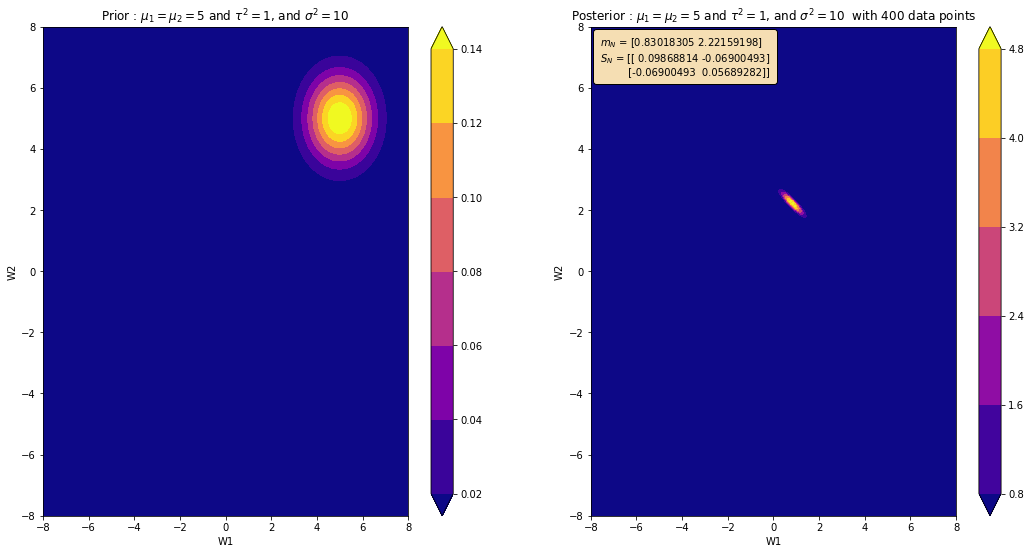

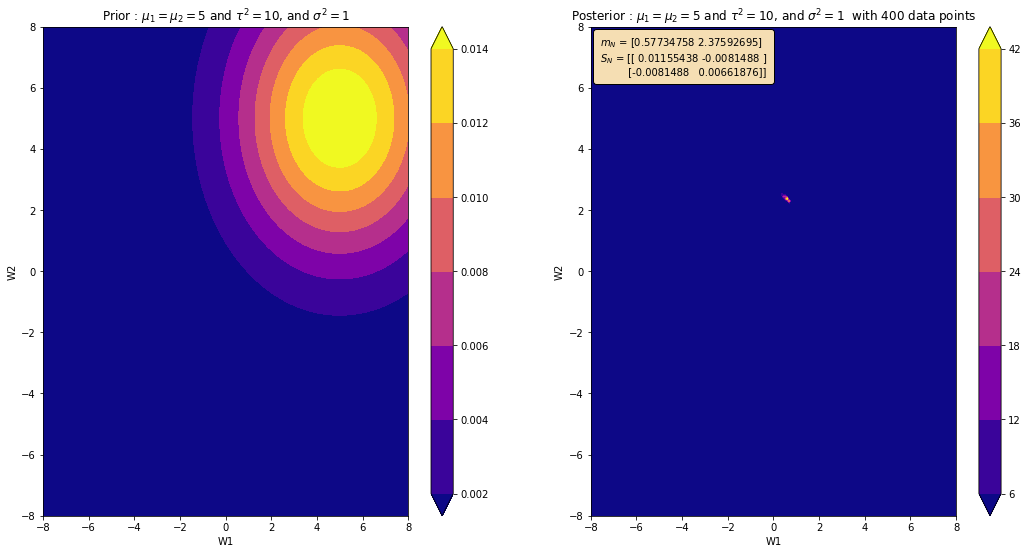

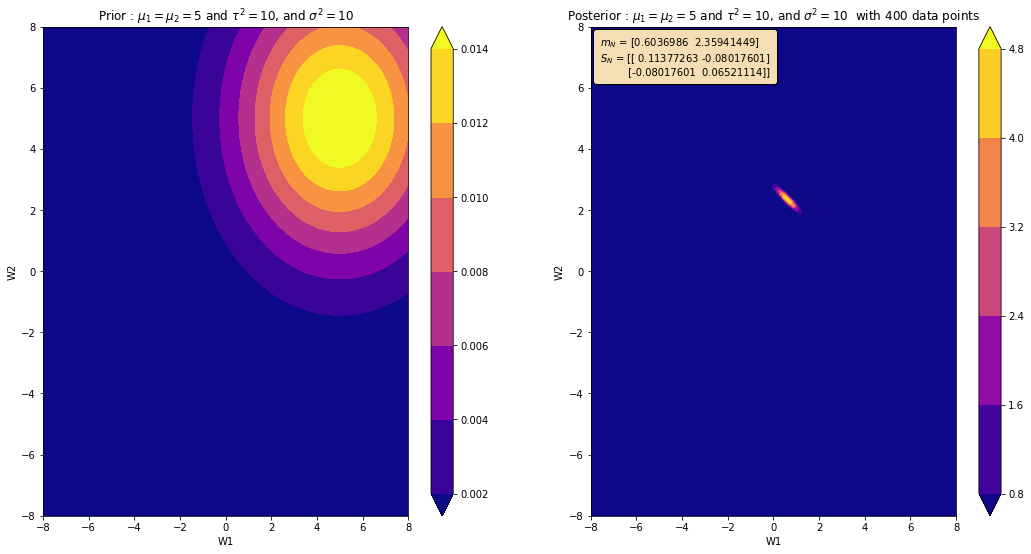

In [79]:
# Cell type : CodeWrite 
from matplotlib.offsetbox import AnchoredText
def getSn(X, sigma, tau):
    lambd = sigma/tau
    S = X.T @ X + lambd*np.identity(2)
    Sn = sigma * np.linalg.inv(S)
    return Sn

def getmn (mo, Sn, X, sigma , tau, Y):
    mn = Sn @ (mo/tau + (X.T @ Y)/sigma )
    return mn

def gauss(mu, sigma, x):
    mu = mu.reshape((mu.shape[0],1))
    #print(sigma.shape)
    det = np.linalg.det(sigma) ** 0.5
    sigmai = np.linalg.inv(sigma)
    x = x.reshape((x.shape[0], 1))
    xeff = (x - mu)
    #print(x.shape, mu.shape)
    nume = -(xeff.T @ sigmai @ xeff)/2
    denr = ((2*np.pi)**(x.shape[0]/2))*det
    return (np.exp(nume))/denr

def plotcontour(title, f, x1mi, x1mx, x2mi, x2mx):
    X,Y = np.meshgrid(np.linspace(x1mi,x1mx,200), np.linspace(x2mi,x2mx,200))
    n1 = 200
    n2 = 200
    x1 = X.reshape((n1*n2,1))
    x2 = Y.reshape((n1*n2,1))
    X_t = np.concatenate((x1,x2),axis=1)
    X =x1.reshape((n1,n2))
    Y =x2.reshape((n1,n2))
    # Get Z using other functions
    Z = np.apply_along_axis(f, 1, X_t).reshape((n1,n2))
    plt.contourf(X,Y,Z,extend = 'both', cmap = 'plasma')
    plt.title(title)
    plt.colorbar()
    plt.ylabel("W2")
    plt.xlabel("W1")

def bayesian_regress(X_data, Y_data):
    for mu in [0,5]:
        for tau in [1,10]:
            for sigma in [1,10]:
                mu1 = np.array([mu,mu])
                tau1 = tau*np.identity(2)
                Sn = getSn(X_data, sigma, tau)
                #print(Sn.shape)
                mn = getmn (mu1, Sn, X_data, sigma , tau, Y_data)
                f_post = lambda x : gauss (mn, Sn, x)
                f_prior = lambda x : gauss (mu1, tau1, x)
                plt.subplot(1,2,1)
                plt.gcf().set_size_inches(18,9)
                title = fr"Prior : $\mu_1=\mu_2={mu}$ and $\tau^2={tau}$, and $\sigma^2={sigma} $"
                plotcontour(title, f_prior, -8, 8, -8, 8)
                plt.subplot(1,2,2)
                plt.gcf().set_size_inches(18,9)
                title = fr"Posterior : $\mu_1=\mu_2={mu}$ and $\tau^2={tau}$, and $\sigma^2={sigma}$  with {Y_data.shape[0]} data points"
                plotcontour(title, f_post, -8, 8, -8, 8)
#                 if Y_data.shape[0] == 400:
#                     plotcontour(title, f_post, -0.25, 1.6, 1.7, 2.85)
#                 else:
#                     plotcontour(title, f_post, -3, 5, -3, 5)
                text = fr"$m_N$ = {mn}" + "\n" + fr"$S_N$ = " + np.array2string(Sn, prefix=fr"$S_N$ = ")                
                props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
                anchored_text = AnchoredText(text, loc=2, frameon = True)
                anchored_text.patch.set_boxstyle('round')
                anchored_text.patch.set_facecolor('wheat')
                plt.gca().add_artist(anchored_text)
                
                plt.show()
                #print("mean = ", mn)
                #print("cov = ", Sn)
            
X_data = np.array(
    [[1.0, 2.0],
    [2.0, 2.1],
    [0.6, 1.5],
    [1.1, 0.9]])

Y_data = np.array([5.1,6.1,4.2,2.9])

bayesian_regress(X_data, Y_data)

X_data_400 = np.repeat(X_data, 100, axis = 0)

Y_data_400 = np.repeat(Y_data, 100, axis = 0)

bayesian_regress(X_data_400, Y_data_400)


** Cell type : TextWrite **

### Distribution

#### Prior
<br>
<li>
     $\mathcal{p}(w) = \mathcal{N}(w | \mu , \tau^2I )$ , where $\mu = [\mu1, \mu2]$
</li>

#### Posterior
<br>
<li>
     $\mathcal{p}(w | y) = \mathcal{N}(w | m_N , S_N )$ 
</li>
<br>
<li>
    $m_N = \dfrac{1}{\sigma^2} S_N ( \lambda \mu + X^Ty)$, where $\lambda = \dfrac{\sigma^2}{\tau^2}$ and $X$ is the $n x d$ dimensional matrix consisting of the data points $x$ and $y$ is the set of target variables 
</li>
<br>
<li> 
    $S_N^{-1} = \dfrac{1}{\sigma^2} ( X^TX + \lambda I) $
</li>
<br>

### Observations
<ol>
<li> Since the conjugate prior of the Gaussian is a Gaussian we observe that the posterior is also a Gaussian </li>
<li> We see that the presence of data points influences the posterior distribution. </li> 
<li>The prior distribution has axes parallel to coordinate axes. The addition of 4 data points has tilted the axes. </li>
<li> We can see that the variance of the posterior increases with $ \sigma ^ 2 $. This variance can be seen as a measure of confidence in our data. Hence a greater variance means lesser confidence in the data and the prior will shift by a lesser extent. On the other hand a smaller variance means that we have more confidence in our data and the influence of prior will be less</li> 
<li>This verifies the variance of the conditional distribution derived by comparing the coefficients of the quadratic form of conditional with respect to a multivariate gaussian distribution. </li>
<li> The variance of the prior $ \tau ^ 2$ can be seen as a measure of our confidence in the prior. Thus a higher variance would mean lesser confidence in the prior and we can see that inclusion of data points distorts the distribution by a greater extent </li>
<li> If the number of data points is 0 or very small then the posterior resembles the prior to a certain extent. </li>
<li> If the number of data points tends to $\infty$ or is very large then the variance of the posterior tends to zero and the distribution converges to the mean of the data points. This means that the influence of the prior is absent when the number of data points is very large. </li>
<li> This can be seen from the plots as when the number of data points is 400 the posterior has shrunk by a great extent and in certain cases we can see only a small dot</li>
</ol>